## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss

from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
warnings.filterwarnings("ignore")


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import pickle


## Reading csv files

In [ ]:
!wget --header="Host: doc-04-4k-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_mm5pe75pf4mhpbdikb2k80b74s62g311_nonce=ngq1v7lujdr1c" --header="Connection: keep-alive" "https://doc-04-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/rskqe3e90nq3ao0n8no2rigogkclk0e5/1641196200000/08255761277798433337/08255761277798433337/1Ypqc0jgmiCmiUg6ju8LPspuEKN37E8eK?e=download&authuser=0&nonce=ngq1v7lujdr1c&user=08255761277798433337&hash=cifjupt1i0nmmenib85g5a1rjrjgjp8n" -c -O 'archive.zip'

--2022-01-03 07:50:22--  https://doc-04-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/rskqe3e90nq3ao0n8no2rigogkclk0e5/1641196200000/08255761277798433337/08255761277798433337/1Ypqc0jgmiCmiUg6ju8LPspuEKN37E8eK?e=download&authuser=0&nonce=ngq1v7lujdr1c&user=08255761277798433337&hash=cifjupt1i0nmmenib85g5a1rjrjgjp8n
Resolving doc-04-4k-docs.googleusercontent.com (doc-04-4k-docs.googleusercontent.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to doc-04-4k-docs.googleusercontent.com (doc-04-4k-docs.googleusercontent.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26631783 (25M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  25.40M  54.3MB/s    in 0.5s    

2022-01-03 07:50:23 (54.3 MB/s) - ‘archive.zip’ saved [26631783/26631783]



In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Test-1542969243754.csv  
  inflating: Test_Beneficiarydata-1542969243754.csv  
  inflating: Test_Inpatientdata-1542969243754.csv  
  inflating: Test_Outpatientdata-1542969243754.csv  
  inflating: Train-1542865627584.csv  
  inflating: Train_Beneficiarydata-1542865627584.csv  
  inflating: Train_Inpatientdata-1542865627584.csv  
  inflating: Train_Outpatientdata-1542865627584.csv  


In [ ]:
Inpatient_data = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Outpatient_data = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
Beneficiary_data = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
y_data = pd.read_csv("Train-1542865627584.csv")


In [ ]:
print('Inpatient_data', Inpatient_data.shape)
print('Outpatient_data', Outpatient_data.shape)
print('Beneficiary_data', Beneficiary_data.shape)
print('y_data', y_data.shape)

Inpatient_data (40474, 30)
Outpatient_data (517737, 27)
Beneficiary_data (138556, 25)
y_data (5410, 2)


## Merging all data

### Appending inpatient and outpatient data


In [ ]:
# Ref:https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/
    
append = [Inpatient_data, Outpatient_data]
appended_in_out_data = pd.concat(append)
display(appended_in_out_data)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,NaN,0.0,NaN,NaN,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,NaN,0.0,NaN,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merging the appended in-patient and out-patient data with beneficiary data

In [ ]:
# Ref: https://stackoverflow.com/questions/43297589/merge-two-data-frames-based-on-common-column-values-in-pandas

appended_data_merged_with_beneficiary_data = pd.merge(appended_in_out_data, Beneficiary_data, on = "BeneID")
appended_data_merged_with_beneficiary_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

### Finally merging appended in - patient, out - patient and beneficiary data with y data

In [ ]:
final_data = pd.merge(appended_data_merged_with_beneficiary_data, y_data, on = "Provider")
final_data.shape

(558211, 55)

### Some pre-processing before EDA

In [ ]:
# Ref: https://stackoverflow.com/questions/33158417/pandas-combine-two-strings-ignore-nan-values
# merging all physicians columns into one single column

final_data['Physicians'] = final_data['AttendingPhysician'].fillna('') +' '+ final_data['OperatingPhysician'].fillna('') + ' ' +final_data['OtherPhysician'].fillna('')

In [ ]:
# merging all diagnosis codes into one single column claimdiagnosis codes

final_data['ClaimDiagnosisCodes'] = final_data['ClmDiagnosisCode_1'].fillna('') +' '+final_data['ClmDiagnosisCode_2'].fillna('') + ' ' +final_data['ClmDiagnosisCode_3'].fillna('')+' '+final_data['ClmDiagnosisCode_4'].fillna('') +' '

+final_data['ClmDiagnosisCode_5'].fillna('') +' '+final_data['ClmDiagnosisCode_6'].fillna('') +' '+final_data['ClmDiagnosisCode_7'].fillna('') +' '
+final_data['ClmDiagnosisCode_8'].fillna('') +' '+final_data['ClmDiagnosisCode_9'].fillna('') +' '+final_data['ClmDiagnosisCode_10'].fillna('')


0          19889 5849 
1         25002 71848 
2          2753 E9305 
3          43812 4019 
4                     
              ...     
558206                
558207                
558208                
558209                
558210                
Length: 558211, dtype: object

In [ ]:
# merging claimDiagnosiscodes column with claimAdmitDiagnosiscodes and naming the new column as AllClaimDiagnosisCodes

final_data['AllClaimDiagnosisCodes'] = final_data['ClmAdmitDiagnosisCode'].fillna('') +' '+final_data['ClaimDiagnosisCodes'].fillna('')

final_data['AllClaimDiagnosisCodes'] = final_data['AllClaimDiagnosisCodes'].replace('\s+', ' ', regex=True)

final_data = final_data.drop(['ClaimDiagnosisCodes'] , axis = 1)


In [ ]:
# Ref: https://stackoverflow.com/questions/22132525/add-column-with-number-of-days-between-dates-in-dataframe-pandas
# calculating age in days

final_data[['DOB','ClaimStartDt']] = final_data[['DOB','ClaimStartDt']].apply(pd.to_datetime)
final_data['Age'] = (final_data['ClaimStartDt'] - final_data['DOB']).dt.days

In [ ]:
# replacing chronic diseseases column value 2 to 0

final_data.loc[final_data['ChronicCond_Alzheimer'] == 2, 'ChronicCond_Alzheimer'] = 0
final_data.loc[final_data['ChronicCond_Heartfailure'] == 2, 'ChronicCond_Heartfailure'] = 0
final_data.loc[final_data['ChronicCond_KidneyDisease'] == 2, 'ChronicCond_KidneyDisease'] = 0
final_data.loc[final_data['ChronicCond_Cancer'] == 2, 'ChronicCond_Cancer'] = 0
final_data.loc[final_data['ChronicCond_ObstrPulmonary'] == 2, 'ChronicCond_ObstrPulmonary'] = 0
final_data.loc[final_data['ChronicCond_Depression'] == 2, 'ChronicCond_Depression'] = 0
final_data.loc[final_data['ChronicCond_Diabetes'] == 2, 'ChronicCond_Diabetes'] = 0
final_data.loc[final_data['ChronicCond_IschemicHeart'] == 2, 'ChronicCond_IschemicHeart'] = 0
final_data.loc[final_data['ChronicCond_Osteoporasis'] == 2, 'ChronicCond_Osteoporasis'] = 0
final_data.loc[final_data['ChronicCond_rheumatoidarthritis'] == 2, 'ChronicCond_rheumatoidarthritis'] = 0
final_data.loc[final_data['ChronicCond_stroke'] == 2, 'ChronicCond_stroke'] = 0


In [ ]:
# filling nan values with 0 to convert float into integer

final_data[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']] = final_data[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']].fillna(0).astype(int)

# replacing 0 with empty 

final_data.loc[final_data['ClmProcedureCode_1'] == 0, 'ClmProcedureCode_1'] = ''
final_data.loc[final_data['ClmProcedureCode_2'] == 0, 'ClmProcedureCode_2'] = ''
final_data.loc[final_data['ClmProcedureCode_3'] == 0, 'ClmProcedureCode_3'] = ''
final_data.loc[final_data['ClmProcedureCode_4'] == 0, 'ClmProcedureCode_4'] = ''
final_data.loc[final_data['ClmProcedureCode_5'] == 0, 'ClmProcedureCode_5'] = ''
final_data.loc[final_data['ClmProcedureCode_6'] == 0, 'ClmProcedureCode_6'] = ''





In [ ]:
# Ref - https://stackoverflow.com/questions/43071415/remove-multiple-blanks-in-dataframe
# converting procedurecodes from integer to string

final_data[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']] = final_data[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']].astype(str)
final_data['ClaimProcedureCodes'] = final_data['ClmProcedureCode_1']+' '+ final_data['ClmProcedureCode_2']+' ' + final_data['ClmProcedureCode_3']+' ' + final_data['ClmProcedureCode_4']+' ' + final_data['ClmProcedureCode_5']+' ' + final_data['ClmProcedureCode_6']

# removing unwanted empty spaces using regex
final_data['ClaimProcedureCodes'] = final_data['ClaimProcedureCodes'].replace('\s+', ' ', regex=True)

final_data[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'ClaimProcedureCodes']]



,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimProcedureCodes
0,,,,,,,
1,,,,,,,
2,7769,5849,,,,,7769 5849
3,9338,,,,,,9338
4,8154,,,,,,8154
...,...,...,...,...,...,...,...
558206,,,,,,,
558207,,,,,,,
558208,,,,,,,
558209,,,,,,,


In [ ]:
# calculating patient HospitalDuration using Admission and Dischargedates.

final_data[['AdmissionDt','DischargeDt']] = final_data[['AdmissionDt','DischargeDt']].apply(pd.to_datetime)
final_data['HospitalDuration'] = (final_data['DischargeDt'] - final_data['AdmissionDt']).dt.days
final_data['HospitalDuration'] = final_data['HospitalDuration'].fillna(0)

final_data[['AdmissionDt','DischargeDt', 'HospitalDuration']]

,AdmissionDt,DischargeDt,HospitalDuration
0,2009-04-12,2009-04-18,6.0
1,NaT,NaT,0.0
2,2009-01-20,2009-02-01,12.0
3,2009-10-17,2009-11-04,18.0
4,2009-10-25,2009-10-29,4.0
...,...,...,...
558206,NaT,NaT,0.0
558207,NaT,NaT,0.0
558208,NaT,NaT,0.0
558209,NaT,NaT,0.0


In [ ]:
# calculating patient ClaimDuration using claimstart and claimend date

final_data[['ClaimStartDt','ClaimEndDt']] = final_data[['ClaimStartDt','ClaimEndDt']].apply(pd.to_datetime)
final_data['ClaimDuration'] = (final_data['ClaimEndDt'] - final_data['ClaimStartDt']).dt.days
final_data['ClaimDuration']


0          6
1          0
2         12
3         18
4          4
          ..
558206     2
558207     0
558208    20
558209     0
558210     0
Name: ClaimDuration, Length: 558211, dtype: int64

In [ ]:
# Calculating number of claim procedure codes and number of claim diagnosis codes

final_data['NumberOfClaimProcedureCodes'] = final_data['ClaimProcedureCodes'].str.split().apply(len)
final_data['NumberOfClaimDiagnosisCodes'] = final_data['AllClaimDiagnosisCodes'].str.split().apply(len)
# final_data['ClaimDuration'] = (final_data['ClaimEndDt'] - final_data['ClaimStartDt']).dt.days
# final_data['HospitalDuration'] = (final_data['DischargeDt'] - final_data['AdmissionDt']).dt.days
# final_data['IsBeneficiaryAlive'] = 0
# final_data.loc[final_data['DOD'].isnull(), 'IsBeneficiaryAlive'] = 1


In [ ]:
# Adding a column whether a beneficiary is alive or not
final_data['IsBeneficiaryAlive'] = 0

In [ ]:
# if DOD is value is null then changing 1 to that row in IsBeneficiaryAlive column
final_data.loc[final_data['DOD'].isnull(), 'IsBeneficiaryAlive'] = 1
final_data['IsBeneficiaryAlive'].value_counts()

1    554080
0      4131
Name: IsBeneficiaryAlive, dtype: int64

In [ ]:
# replacing potentialfraud column with yes value to 1 and no value to 0

final_data['PotentialFraud'] = final_data['PotentialFraud'].replace(['Yes'], 1)
final_data['PotentialFraud'] = final_data['PotentialFraud'].replace(['No'], 0)

In [ ]:
# dropping unwanted columns

final_data = final_data.drop(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt','AdmissionDt', 'DischargeDt', 'DOB', 'DOD'], axis = 1)

In [ ]:
# replacing renaldiseaseindicator column value y with 1

final_data['RenalDiseaseIndicator'] = final_data['RenalDiseaseIndicator'].replace(['Y'], 1)

In [ ]:
# replacing nan values in diagnosisgroupcode column with 0

final_data['DiagnosisGroupCode'] = final_data['DiagnosisGroupCode'].fillna(0)

In [ ]:
Y = final_data['PotentialFraud']
X = final_data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
# X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.2)

## Exploratory Data Analysis

### Class Distribution

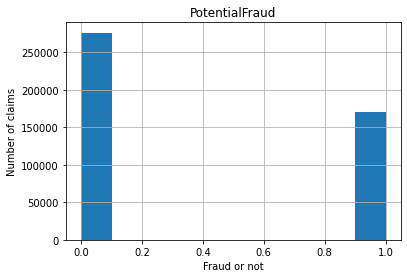

In [ ]:
X_train.hist(column='PotentialFraud');
plt.xlabel("Fraud or not")
plt.ylabel("Number of claims")
plt.show()

1. There are more than 2.5 lakh genuine claims and around 1.6 lakh fraudulent claims
2. The data is not extremely imbalanced

### Univariate analysis

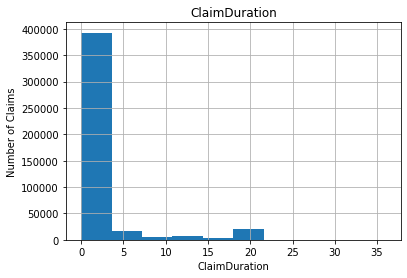

In [ ]:
X_train.hist(column='ClaimDuration');
plt.xlabel("ClaimDuration")
plt.ylabel("Number of Claims")
plt.show()

 From the histogram of claim duration, we infer that

 1. Almost 3.5L number of claims are done within 0 to 5 days(0 means insurance claimed on the same day when it was applied)
 2. Less than 20000 claims took almost 18 to 22 days

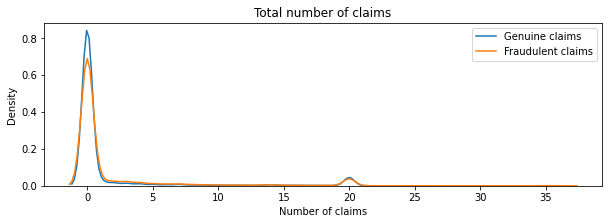

In [ ]:
genuine_claim_duration = X_train[X_train['PotentialFraud']==0]['ClaimDuration'].values
fraudulent_claim_duration = X_train[X_train['PotentialFraud']==1]['ClaimDuration'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_duration, hist=False, label="Genuine claims")
sns.distplot(fraudulent_claim_duration, hist=False, label="Fraudulent claims")
plt.title('Total number of claims')
plt.xlabel('Number of claims')
plt.legend()
plt.show()

1. In the above plot, we are plotting pdf curve for genuine and fraudulent claims of potential fraud column against claim duration
2. Though we couldn't get more details from the curve due to overlapping, we can say that 80% of genuine claims are less than 2 days


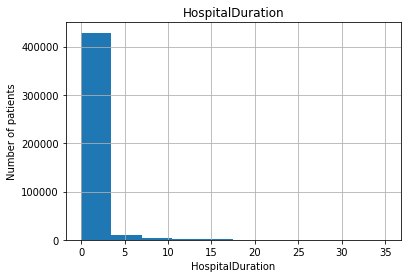

In [ ]:
X_train.hist(column='HospitalDuration');
plt.xlabel("HospitalDuration")
plt.ylabel("Number of patients")
plt.show()

From the hospital duration histogram, we observe that
1. Almost 4.5L patients are there in the hospital for about 4 days

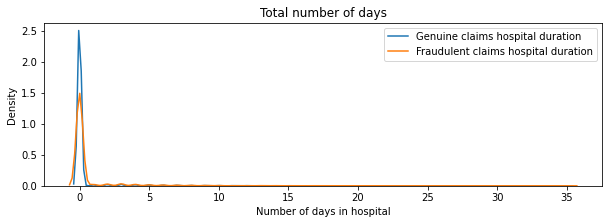

In [ ]:
genuine_claim_hospital_duration = X_train[X_train['PotentialFraud']==0]['HospitalDuration'].values
fraudulent_claim_hospital_duration = X_train[X_train['PotentialFraud']==1]['HospitalDuration'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_hospital_duration, hist=False, label="Genuine claims hospital duration")
sns.distplot(fraudulent_claim_hospital_duration, hist=False, label="Fraudulent claims hospital duration")
plt.title('Total number of days')
plt.xlabel('Number of days in hospital')
plt.legend()
plt.show()

Here we are plotting pdf of genuine and fraudulent claims hospital duration against potential fraud column
1. We could see that patients less than 3 days in the hospital are genuine claims of more than 15%
2. Also 14% of patients admitted less than 3 days in the hospital are fraudulent claims.
3. We cannot get clear separation of genuine and fraudulent claims here.

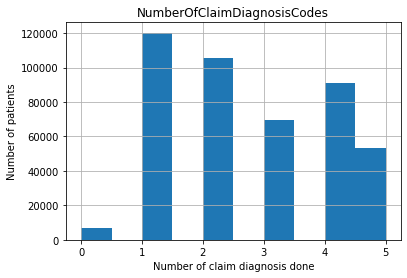

In [ ]:
X_train.hist(column='NumberOfClaimDiagnosisCodes');
plt.xlabel("Number of claim diagnosis done")
plt.ylabel("Number of patients")
plt.show()

Here we are plotting histogram of number of claim diagnosis codes
1. Almost for all patients , a maximum of 4 daignosis is done
2. Less than 50k patients have undergone 5 daignosis
3. Less than 5k patients have done no diagnosis

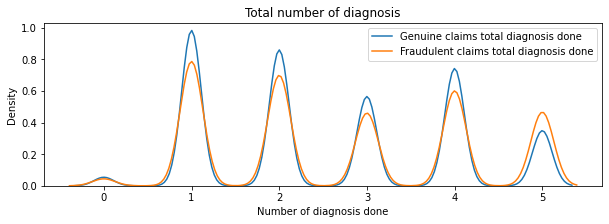

In [ ]:
genuine_claim_total_diagnosis_done = X_train[X_train['PotentialFraud']==0]['NumberOfClaimDiagnosisCodes'].values
fraudulent_claim_total_diagnosis_done = X_train[X_train['PotentialFraud']==1]['NumberOfClaimDiagnosisCodes'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_total_diagnosis_done, hist=False, label="Genuine claims total diagnosis done")
sns.distplot(fraudulent_claim_total_diagnosis_done, hist=False, label="Fraudulent claims total diagnosis done")
plt.title('Total number of diagnosis')
plt.xlabel('Number of diagnosis done')
plt.legend()
plt.show()

pdf of genuine and fraudulent claims number of diagnosis done against potential fraud column
1. Here we can see that a total of 5 claim diagnosis done for the patients are mostly of about 60% fraudulent claims
2. Here also there is a overlapping of both the claims but there are almost 80% of genuine claims for maximum of 2 diagnosis

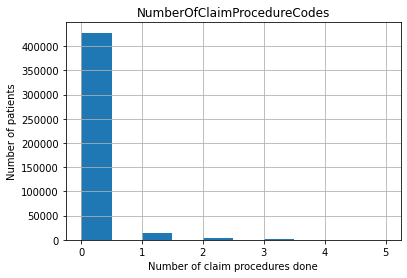

In [ ]:
X_train.hist(column='NumberOfClaimProcedureCodes');
plt.xlabel("Number of claim procedures done")
plt.ylabel("Number of patients")
plt.show()

1. Histogram says that, less than 20k patients have done 1 procedure
2. Also less than 5k patients have done 2 procedures
3. Very few patients have done a total of 3,4 and 5 procedures

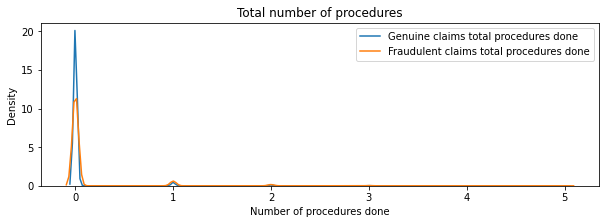

In [ ]:
genuine_claim_total_procedures_done = X_train[X_train['PotentialFraud']==0]['NumberOfClaimProcedureCodes'].values
fraudulent_claim_total_procedures_done = X_train[X_train['PotentialFraud']==1]['NumberOfClaimProcedureCodes'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_total_procedures_done, hist=False, label="Genuine claims total procedures done")
sns.distplot(fraudulent_claim_total_procedures_done, hist=False, label="Fraudulent claims total procedures done")
plt.title('Total number of procedures')
plt.xlabel('Number of procedures done')
plt.legend()
plt.show()

1. Again the pdf curve is overlapping, we can only say that, more than 10% of patients have done no procedures at all

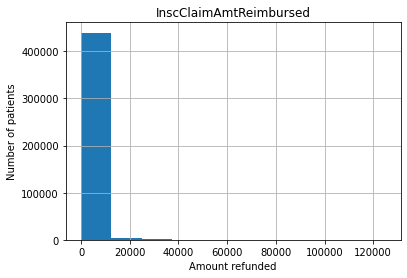

In [ ]:
X_train.hist(column='InscClaimAmtReimbursed');
plt.xlabel("Amount refunded")
plt.ylabel("Number of patients")
plt.show()

1. Almost 10 to 15k dollars refunded for about 3.5L plus patients
2. It's very few for patients greater than 30k is refunded 

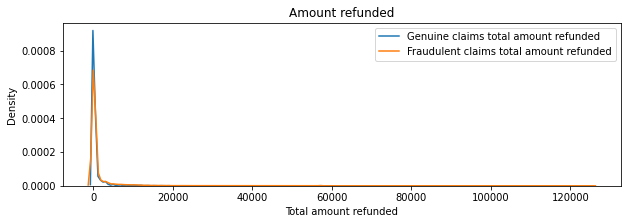

In [ ]:
genuine_claim_total_amount_reimbursed = X_train[X_train['PotentialFraud']==0]['InscClaimAmtReimbursed'].values
fraudulent_claim_total_amount_reimbursed = X_train[X_train['PotentialFraud']==1]['InscClaimAmtReimbursed'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_total_amount_reimbursed, hist=False, label="Genuine claims total amount refunded")
sns.distplot(fraudulent_claim_total_amount_reimbursed, hist=False, label="Fraudulent claims total amount refunded")
plt.title('Amount refunded')
plt.xlabel('Total amount refunded')
plt.legend()
plt.show()

 We can say that the lesser amount claimed by the patients are more the genuine

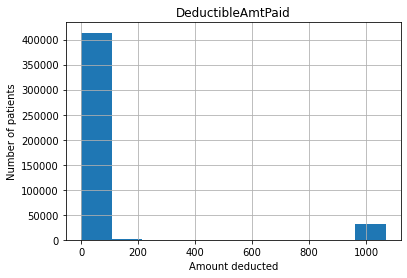

In [ ]:
X_train.hist(column='DeductibleAmtPaid');
plt.xlabel("Amount deducted")
plt.ylabel("Number of patients")
plt.show()

1. Here we see that less than 30k patients have been charged 1000 dollars
2. Most of the patients have been charged between 0 and 200 dollars

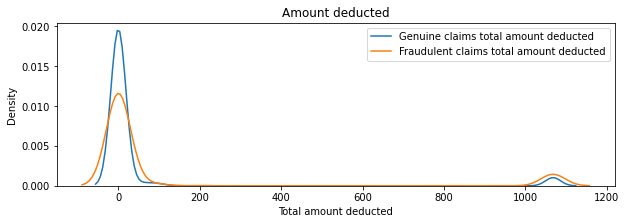

In [ ]:
genuine_claim_total_amount_deducted = X_train[X_train['PotentialFraud']==0]['DeductibleAmtPaid'].values
fraudulent_claim_total_amount_deducted = X_train[X_train['PotentialFraud']==1]['DeductibleAmtPaid'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_total_amount_deducted, hist=False, label="Genuine claims total amount deducted")
sns.distplot(fraudulent_claim_total_amount_deducted, hist=False, label="Fraudulent claims total amount deducted")
plt.title('Amount deducted')
plt.xlabel('Total amount deducted')
plt.legend()
plt.show()

1. Though there is a overlapping, we see that more than 1% of the patients have been charged between 0 and 200 dollars

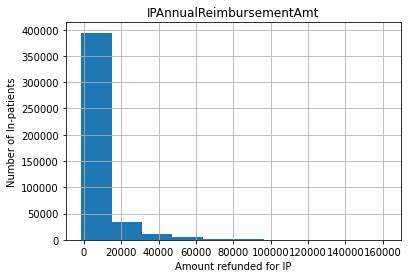

In [ ]:
X_train.hist(column='IPAnnualReimbursementAmt');
plt.xlabel("Amount refunded for IP")
plt.ylabel("Number of In-patients")
plt.show()

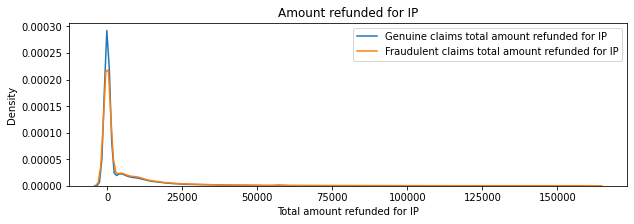

In [ ]:
genuine_claim_total_amount_refunded_for_IP = X_train[X_train['PotentialFraud']==0]['IPAnnualReimbursementAmt'].values
fraudulent_claim_total_amount_refunded_for_IP = X_train[X_train['PotentialFraud']==1]['IPAnnualReimbursementAmt'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_total_amount_refunded_for_IP, hist=False, label="Genuine claims total amount refunded for IP")
sns.distplot(fraudulent_claim_total_amount_refunded_for_IP, hist=False, label="Fraudulent claims total amount refunded for IP")
plt.title('Amount refunded for IP')
plt.xlabel('Total amount refunded for IP')
plt.legend()
plt.show()

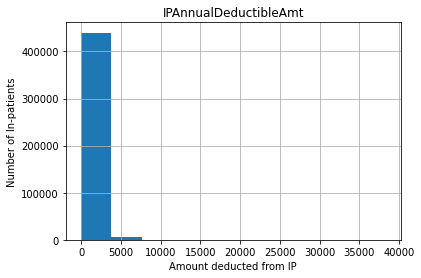

In [ ]:
X_train.hist(column='IPAnnualDeductibleAmt');
plt.xlabel("Amount deducted from IP")
plt.ylabel("Number of In-patients")
plt.show()

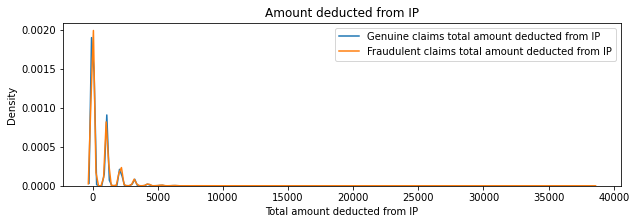

In [ ]:
genuine_claim_total_amount_deducted_from_IP = X_train[X_train['PotentialFraud']==0]['IPAnnualDeductibleAmt'].values
fraudulent_claim_total_amount_deducted_from_IP = X_train[X_train['PotentialFraud']==1]['IPAnnualDeductibleAmt'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_total_amount_deducted_from_IP, hist=False, label="Genuine claims total amount deducted from IP")
sns.distplot(fraudulent_claim_total_amount_deducted_from_IP, hist=False, label="Fraudulent claims total amount deducted from IP")
plt.title('Amount deducted from IP')
plt.xlabel('Total amount deducted from IP')
plt.legend()
plt.show()

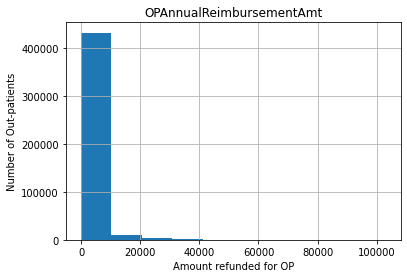

In [ ]:
X_train.hist(column='OPAnnualReimbursementAmt');
plt.xlabel("Amount refunded for OP")
plt.ylabel("Number of Out-patients")
plt.show()

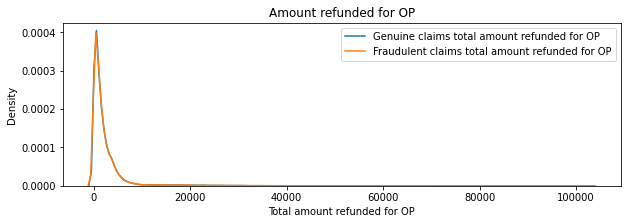

In [ ]:
genuine_claim_total_amount_refunded_for_OP = X_train[X_train['PotentialFraud']==0]['OPAnnualReimbursementAmt'].values
fraudulent_claim_total_amount_refunded_for_OP = X_train[X_train['PotentialFraud']==1]['OPAnnualReimbursementAmt'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_total_amount_refunded_for_OP, hist=False, label="Genuine claims total amount refunded for OP")
sns.distplot(fraudulent_claim_total_amount_refunded_for_OP, hist=False, label="Fraudulent claims total amount refunded for OP")
plt.title('Amount refunded for OP')
plt.xlabel('Total amount refunded for OP')
plt.legend()
plt.show()

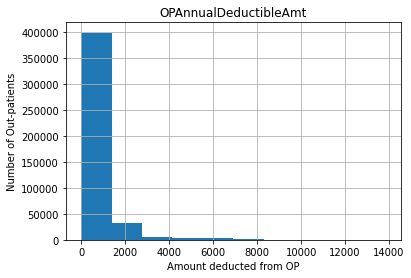

In [ ]:
X_train.hist(column='OPAnnualDeductibleAmt');
plt.xlabel("Amount deducted from OP")
plt.ylabel("Number of Out-patients")
plt.show()

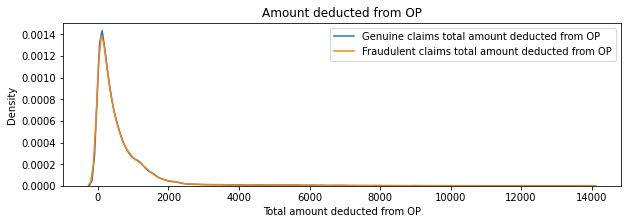

In [ ]:
genuine_claim_total_amount_deducted_from_OP = X_train[X_train['PotentialFraud']==0]['OPAnnualDeductibleAmt'].values
fraudulent_claim_total_amount_deducted_from_OP = X_train[X_train['PotentialFraud']==1]['OPAnnualDeductibleAmt'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_total_amount_deducted_from_OP, hist=False, label="Genuine claims total amount deducted from OP")
sns.distplot(fraudulent_claim_total_amount_deducted_from_OP, hist=False, label="Fraudulent claims total amount deducted from OP")
plt.title('Amount deducted from OP')
plt.xlabel('Total amount deducted from OP')
plt.legend()
plt.show()

1. Since there is a lot of overlap in IP and OP reimbursement and deductible features, we couldn't arrive at a better conclusion
2. One observation - it's bell-curved but right-skewed

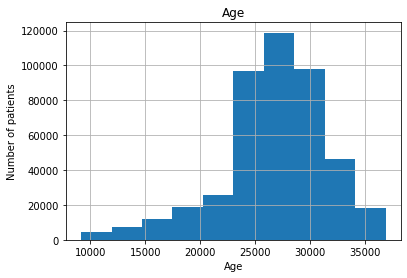

In [ ]:
X_train.hist(column='Age');
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.show()

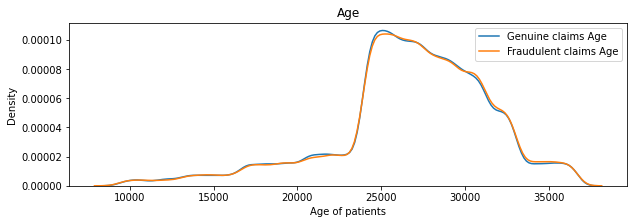

In [ ]:
genuine_claim_Age = X_train[X_train['PotentialFraud']==0]['Age'].values
fraudulent_claim_Age = X_train[X_train['PotentialFraud']==1]['Age'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_Age, hist=False, label="Genuine claims Age")
sns.distplot(fraudulent_claim_Age, hist=False, label="Fraudulent claims Age")
plt.title('Age')
plt.xlabel('Age of patients')
plt.legend()
plt.show()

1. Patients between 23000 and 35000 (days) have claimed a lot
2. Both the genuine and fraudulent claims are overlapping

In [ ]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
# Ref - Donor's Choose assignment
def stack_plot(data, xtick, col2='PotentialFraud', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Claims')
    plt.title('% of genuine and fraudulent claims')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'fraudulent'))
    plt.show()

In [ ]:
# Ref - Donor's Choose assignment
def univariate_barplots(data, col1, col2='PotentialFraud', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

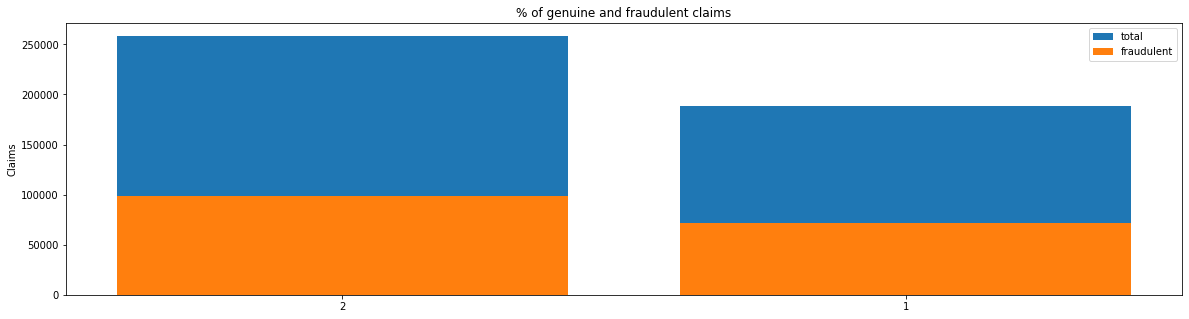

   Gender  PotentialFraud   total       Avg
1       2           98417  258437  0.380816
0       1           71819  188131  0.381750
   Gender  PotentialFraud   total       Avg
1       2           98417  258437  0.380816
0       1           71819  188131  0.381750


In [ ]:
univariate_barplots(X_train, 'Gender', 'PotentialFraud', False)

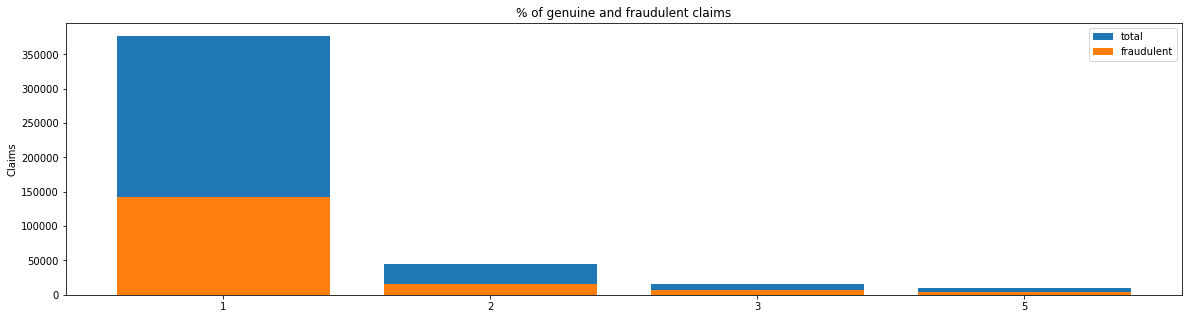

   Race  PotentialFraud   total       Avg
0     1          142595  376837  0.378400
1     2           16284   44549  0.365530
2     3            7173   15790  0.454275
3     5            4184    9392  0.445486
   Race  PotentialFraud   total       Avg
0     1          142595  376837  0.378400
1     2           16284   44549  0.365530
2     3            7173   15790  0.454275
3     5            4184    9392  0.445486


In [ ]:
univariate_barplots(X_train, 'Race', 'PotentialFraud', False)

1. In race 3 and 5, close to 45% claims are fraudulent

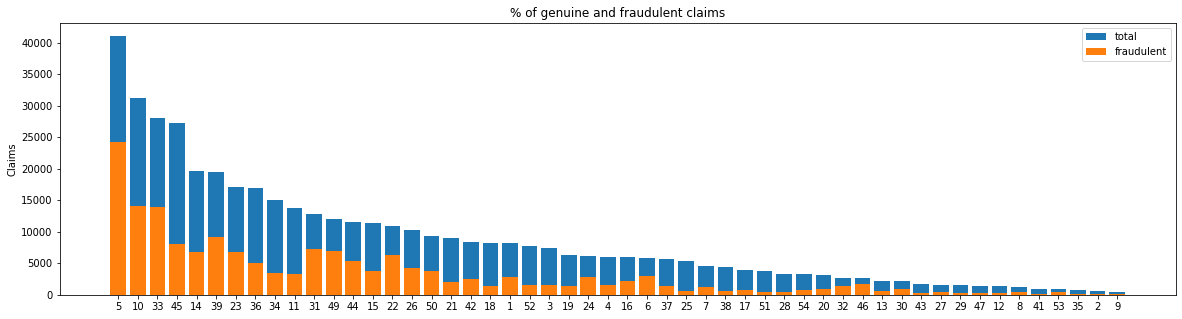

    State  PotentialFraud  total       Avg
4       5           24250  41077  0.590355
9      10           14074  31217  0.450844
32     33           13962  27999  0.498661
43     45            8091  27289  0.296493
13     14            6850  19582  0.349811
    State  PotentialFraud  total       Avg
39     41             126    897  0.140468
50     53             376    863  0.435689
34     35              64    732  0.087432
1       2             170    580  0.293103
8       9             145    484  0.299587


In [ ]:
univariate_barplots(X_train, 'State', 'PotentialFraud', False)

1. In state 5, about 60 % claims are fraudulent

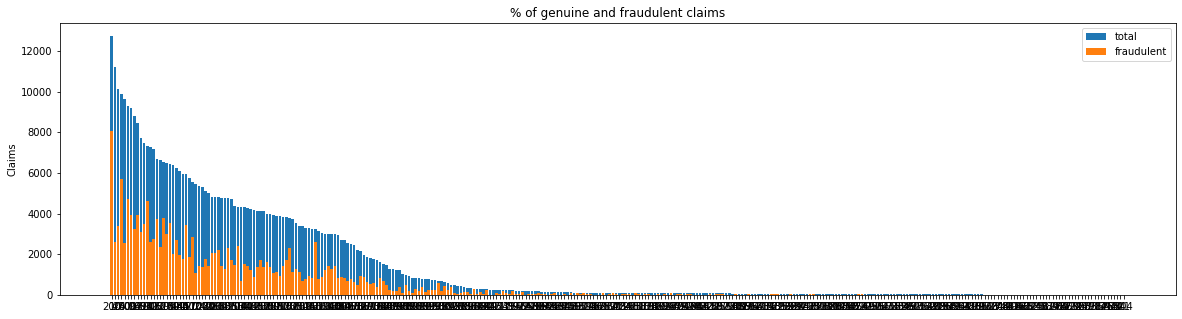

    County  PotentialFraud  total       Avg
36     200            8042  12740  0.631240
2       10            2590  11206  0.231126
5       20            3375  10121  0.333465
99     470            5684   9899  0.574199
12      60            2574   9660  0.266460
     County  PotentialFraud  total  Avg
178     753               0      2  0.0
271     944               0      2  0.0
216     834               1      1  1.0
107     521               0      1  0.0
206     804               0      1  0.0


In [ ]:
univariate_barplots(X_train, 'County', 'PotentialFraud', False)

1. In county 200, a maximum of 63% claims are fraudulent
2. In county 470, close to 57% claims are fraudulent claims

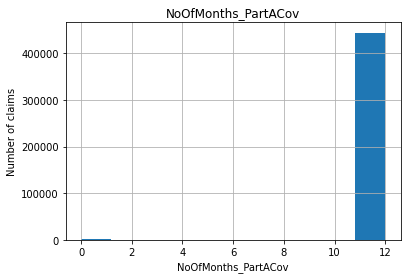

In [ ]:
X_train.hist(column='NoOfMonths_PartACov');
plt.xlabel("NoOfMonths_PartACov")
plt.ylabel("Number of claims")
plt.show()

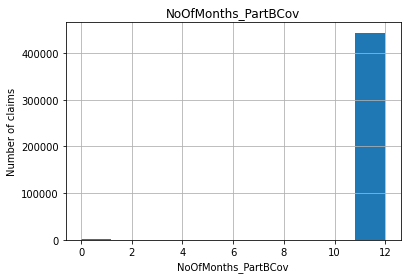

In [ ]:
X_train.hist(column='NoOfMonths_PartBCov');
plt.xlabel("NoOfMonths_PartBCov")
plt.ylabel("Number of claims")
plt.show()

1. Since the columns partACov and partBCov have only one value(dominant value),  we are dropping it

In [ ]:
# dropping unwanted columns

X_train = X_train.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis = 1)
X_test = X_test.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis = 1)
# X_cv = X_cv.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis = 1)

### TSNE on Chronic diseases columns

In [ ]:
# Ref - https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)

tsne_input_data = X_train[['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']].values

tsne_results = tsne.fit_transform(tsne_input_data)


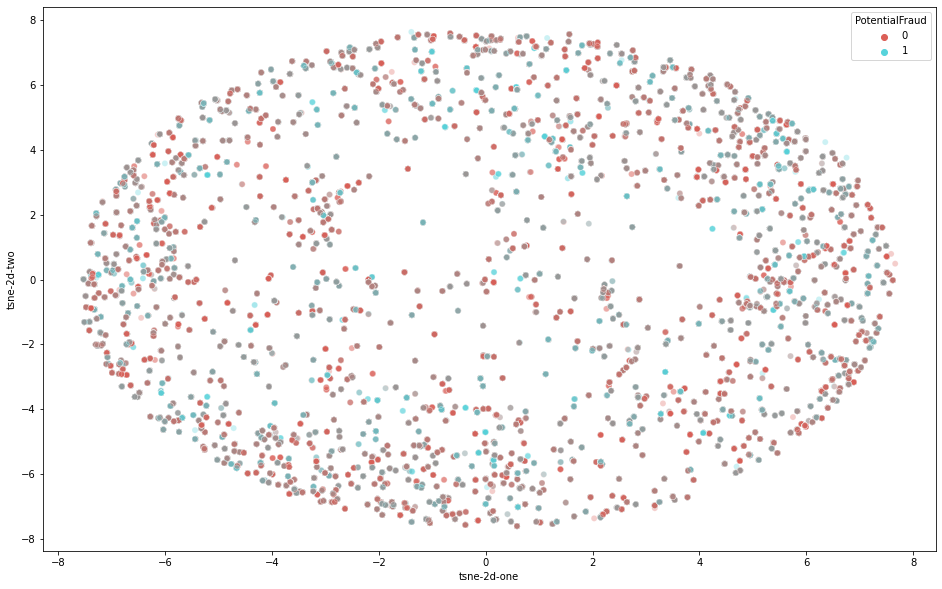

In [ ]:
# reducing 11 dimensions to 2 dimensions
tsne_output = {'tsne-2d-one': tsne_results[:,0], 'tsne-2d-two':tsne_results[:,1], 'PotentialFraud': X_train['PotentialFraud'].values}

# creating dataframe
tsne_output_df = pd.DataFrame(tsne_output)


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="PotentialFraud",
    palette=sns.color_palette("hls", 2),
    data=tsne_output_df,
    legend="full",
    alpha=0.3
)

plt.show()

1. There is no clear clustering of fraudulent claims in t-sne scatterplot. t-sne is inconclusive

### Bivariate analysis

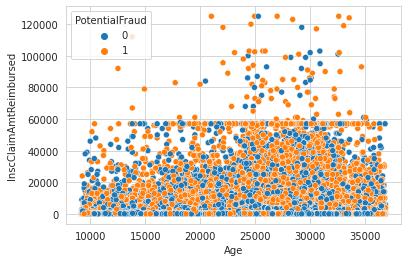

In [ ]:
plt.close()
sns.set_style("whitegrid");
sp = sns.scatterplot(data = X_train, hue="PotentialFraud", x = 'Age', y = 'InscClaimAmtReimbursed');
plt.show()

1. Patients in the age between 20000 and 30000 who have claimed more than 20000 dollars are mostly fraudulent claims
2. Patients who have claimed less than 15000 dollars are mostly genuine claims

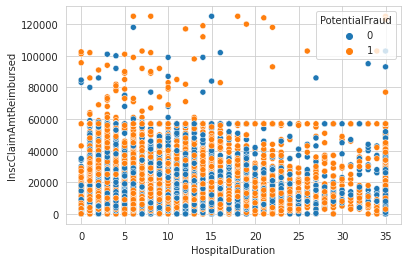

In [ ]:
plt.close()
sns.set_style("whitegrid");
sp = sns.scatterplot(data = X_train, hue="PotentialFraud", x = 'HospitalDuration', y = 'InscClaimAmtReimbursed');
plt.show()

1. A good percentage fraudulent claims seem to happen when patients are hospitalized for more than 15 days
2. Patients hospitalized for less than 5 days tend to have genuine claims, unless insurance claim amount is more than 60000


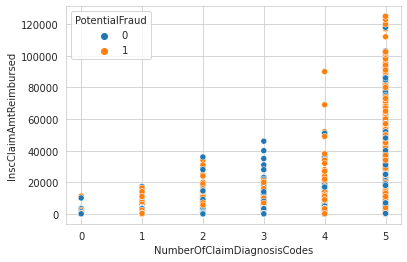

In [ ]:
plt.close()
sns.set_style("whitegrid");
sp = sns.scatterplot(data = X_train, hue="PotentialFraud", x = 'NumberOfClaimDiagnosisCodes', y = 'InscClaimAmtReimbursed');
plt.show()

1. Patients who have undergone 5 diagnosis and claimed more than 60000 dollars tend to be fraudulent claims
2. Patients who have undergone less than 3 diagnosis are mostly genuine claims

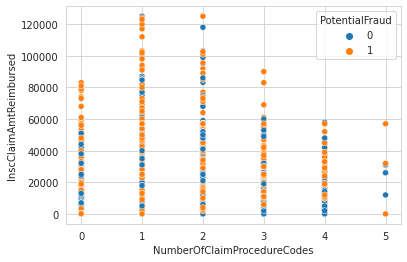

In [ ]:
plt.close()
sns.set_style("whitegrid");
sp = sns.scatterplot(data = X_train, hue="PotentialFraud", x = 'NumberOfClaimProcedureCodes', y = 'InscClaimAmtReimbursed');
plt.show()

1. Patients who have done more than 3 procedures are mostly the fraudulent claims
2. Patients who have undergone less than 3 procedures and claimed a maximum of 40000 dollars are fraudulent claims 

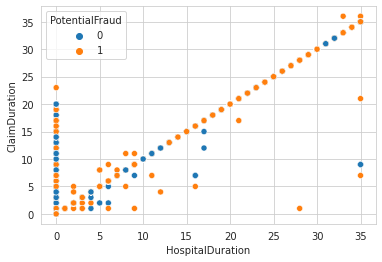

In [ ]:
plt.close()
sns.set_style("whitegrid");
sp = sns.scatterplot(data = X_train, hue="PotentialFraud", x = 'HospitalDuration', y = 'ClaimDuration');
plt.show()

1. In some cases, claim duration has a non zero value when hospital duration is zero. This is for out patient data
2. For in patient data, hospital duration and claim duration are almost perfectly linearly correlated
3. We will be introducing a new feature called Additional claim duration by taking the difference  of these two features

In [ ]:
X_train['AdditionalClaimduration'] = X_train['HospitalDuration'] - X_train['ClaimDuration']
# X_cv['AdditionalClaimduration'] = X_cv['HospitalDuration'] - X_cv['ClaimDuration']
X_test['AdditionalClaimduration'] = X_test['HospitalDuration'] - X_test['ClaimDuration']

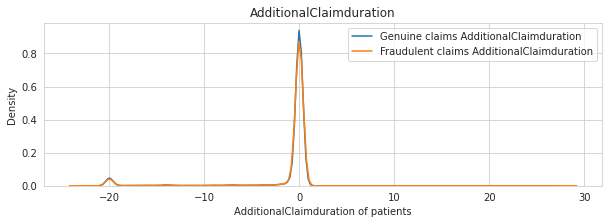

In [ ]:
genuine_claim_AdditionalClaimduration = X_train[X_train['PotentialFraud']==0]['AdditionalClaimduration'].values
fraudulent_claim_AdditionalClaimduration = X_train[X_train['PotentialFraud']==1]['AdditionalClaimduration'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_AdditionalClaimduration, hist=False, label="Genuine claims AdditionalClaimduration")
sns.distplot(fraudulent_claim_AdditionalClaimduration, hist=False, label="Fraudulent claims AdditionalClaimduration")
plt.title('AdditionalClaimduration')
plt.xlabel('AdditionalClaimduration of patients')
plt.legend()
plt.show()

In [ ]:
## Removing outliers in AdditionalClaimDuration column. 

X_train.loc[X_train['AdditionalClaimduration'] <= -10, 'AdditionalClaimduration'] = 0


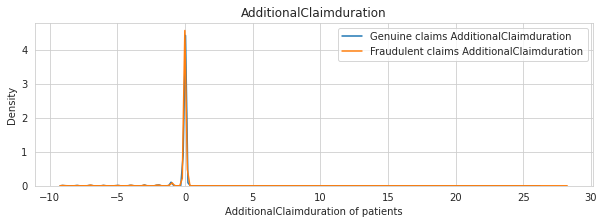

In [ ]:
genuine_claim_AdditionalClaimduration = X_train[X_train['PotentialFraud']==0]['AdditionalClaimduration'].values
fraudulent_claim_AdditionalClaimduration = X_train[X_train['PotentialFraud']==1]['AdditionalClaimduration'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_AdditionalClaimduration, hist=False, label="Genuine claims AdditionalClaimduration")
sns.distplot(fraudulent_claim_AdditionalClaimduration, hist=False, label="Fraudulent claims AdditionalClaimduration")
plt.title('AdditionalClaimduration')
plt.xlabel('AdditionalClaimduration of patients')
plt.legend()
plt.show()

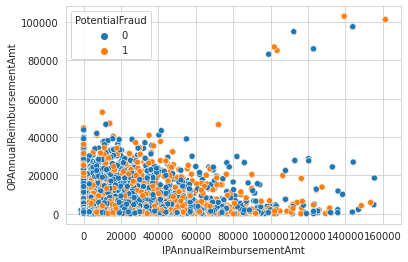

In [ ]:
plt.close()
sns.set_style("whitegrid");
sp = sns.scatterplot(data = X_train, hue="PotentialFraud", x = 'IPAnnualReimbursementAmt', y = 'OPAnnualReimbursementAmt');
plt.show()

1. The above plot resembles ax1 + bx2 < k (linear inequality)
2. There are few outliers with equal possibility of genuine and fraudulent claims
3. We will be adding these two features to come up with new feature named TotalAnnualReimbursementAmount

In [ ]:
X_train['TotalAnnualReimbursementAmount'] = X_train['IPAnnualReimbursementAmt'] + X_train['OPAnnualReimbursementAmt']
# X_cv['TotalAnnualReimbursementAmount'] = X_cv['IPAnnualReimbursementAmt'] + X_cv['OPAnnualReimbursementAmt']
X_test['TotalAnnualReimbursementAmount'] = X_test['IPAnnualReimbursementAmt'] + X_test['OPAnnualReimbursementAmt']

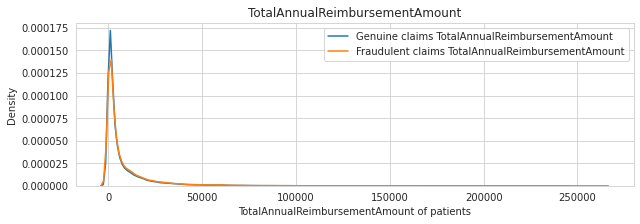

In [ ]:
genuine_claim_TotalAnnualReimbursementAmount = X_train[X_train['PotentialFraud']==0]['TotalAnnualReimbursementAmount'].values
fraudulent_claim_TotalAnnualReimbursementAmount = X_train[X_train['PotentialFraud']==1]['TotalAnnualReimbursementAmount'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_TotalAnnualReimbursementAmount, hist=False, label="Genuine claims TotalAnnualReimbursementAmount")
sns.distplot(fraudulent_claim_TotalAnnualReimbursementAmount, hist=False, label="Fraudulent claims TotalAnnualReimbursementAmount")
plt.title('TotalAnnualReimbursementAmount')
plt.xlabel('TotalAnnualReimbursementAmount of patients')
plt.legend()
plt.show()

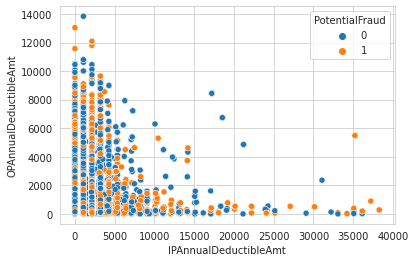

In [ ]:
plt.close()
sns.set_style("whitegrid");
sp = sns.scatterplot(data = X_train, hue="PotentialFraud", x = 'IPAnnualDeductibleAmt', y = 'OPAnnualDeductibleAmt');
plt.show()

1. The above plot resembles ax1 + bx2 < k (linear inequality)
2. There are few outliers with higher probability of genuine claims
3. We will be adding these two features to come up with new feature named TotalAnnualDeductibleAmount

In [ ]:
X_train['TotalAnnualDeductibleAmount'] = X_train['IPAnnualDeductibleAmt'] + X_train['OPAnnualDeductibleAmt']
# X_cv['TotalAnnualDeductibleAmount'] = X_cv['IPAnnualDeductibleAmt'] + X_cv['OPAnnualDeductibleAmt']
X_test['TotalAnnualDeductibleAmount'] = X_test['IPAnnualDeductibleAmt'] + X_test['OPAnnualDeductibleAmt']

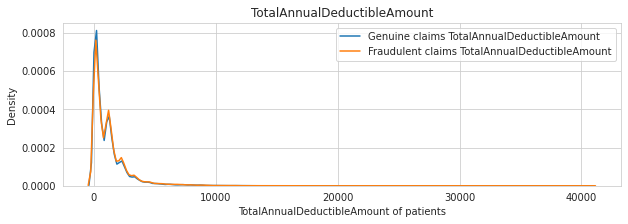

In [ ]:
genuine_claim_TotalAnnualDeductibleAmount = X_train[X_train['PotentialFraud']==0]['TotalAnnualDeductibleAmount'].values
fraudulent_claim_TotalAnnualDeductibleAmount = X_train[X_train['PotentialFraud']==1]['TotalAnnualDeductibleAmount'].values


plt.figure(figsize=(10,3))
sns.distplot(genuine_claim_TotalAnnualDeductibleAmount, hist=False, label="Genuine claims TotalAnnualDeductibleAmount")
sns.distplot(fraudulent_claim_TotalAnnualDeductibleAmount, hist=False, label="Fraudulent claims TotalAnnualDeductibleAmount")
plt.title('TotalAnnualDeductibleAmount')
plt.xlabel('TotalAnnualDeductibleAmount of patients')
plt.legend()
plt.show()

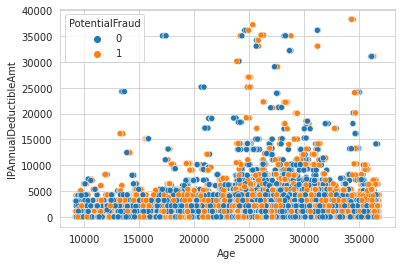

In [ ]:
plt.close()
sns.set_style("whitegrid");
sp = sns.scatterplot(data = X_train, hue="PotentialFraud", x = 'Age', y = 'IPAnnualDeductibleAmt');
plt.show()

1. Generally IP anuual deductible amount remains constant
2. There are few outliers particularly when age is higher

In [ ]:
X_train['DeductibleAmtPaid'] = X_train['DeductibleAmtPaid'].fillna(0)
# X_cv['DeductibleAmtPaid'] = X_cv['DeductibleAmtPaid'].fillna(0)
X_test['DeductibleAmtPaid'] = X_test['DeductibleAmtPaid'].fillna(0)


### Collinearity check using VIF

**VIF is a number that determines whether a variable has multicollinearity or not. That number also represents how much a variable is inflated because of the linear dependence with other variables.**

In [ ]:
# Ref:https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Age', 'NumberOfClaimProcedureCodes',
 'NumberOfClaimDiagnosisCodes', 'TotalAnnualDeductibleAmount', 'TotalAnnualReimbursementAmount', 'AdditionalClaimduration']


X_train_numeric = X_train[numeric_columns]



vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]
vif_info['Column'] = X_train_numeric.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
4,5.131159,NumberOfClaimDiagnosisCodes
2,4.598094,Age
5,3.016653,TotalAnnualDeductibleAmount
6,2.870947,TotalAnnualReimbursementAmount
1,2.596286,DeductibleAmtPaid
0,2.311865,InscClaimAmtReimbursed
3,2.108111,NumberOfClaimProcedureCodes
7,1.039299,AdditionalClaimduration


1. Final Numerical columns are not highly multicollinear

### Numeric features statistics

In [ ]:
X_train_numeric.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Age,NumberOfClaimProcedureCodes,NumberOfClaimDiagnosisCodes,TotalAnnualDeductibleAmount,TotalAnnualReimbursementAmount,AdditionalClaimduration
count,446568.000000,446568.000000,446568.000000,446568.000000,446568.000000,446568.000000,446568.000000,446568.000000
mean,994.959872,77.851138,26778.973162,0.053154,2.621713,1218.187159,7496.858731,-0.165663
std,3833.717237,273.031873,4750.720276,0.279281,1.408936,1649.797995,13034.559317,0.922841
min,0.000000,0.000000,9165.000000,0.000000,0.000000,0.000000,-900.000000,-9.000000
25%,40.000000,0.000000,24675.000000,0.000000,1.000000,210.000000,710.000000,0.000000
50%,80.000000,0.000000,27111.000000,0.000000,2.000000,730.000000,2320.000000,0.000000
75%,300.000000,0.000000,29940.000000,0.000000,4.000000,1550.000000,8400.000000,0.000000
max,125000.000000,1068.000000,36888.000000,5.000000,5.000000,40694.000000,262720.000000,28.000000


## Featurisation

### Applying one hot encoding for categorical features : State, Gender, Race and County

In [ ]:
# Ref - https://stackoverflow.com/questions/43601358/empty-vocabulary-for-single-letter-by-countvectorizer
vectorizer = CountVectorizer(binary=True, token_pattern = r"(?u)\b\w+\b")
vectorizer.fit(X_train['State'].astype(str).values)
state_train_ohe = vectorizer.transform(X_train['State'].astype(str).values)
# state_cv_ohe = vectorizer.transform(X_cv['State'].astype(str).values)
state_test_ohe = vectorizer.transform(X_test['State'].astype(str).values)

state_features = vectorizer.get_feature_names()

# Column names will be state_1, state_2...and not 1, 2...this is beacuse to identify which features column it is.
state_features = ['state_' + st for st in state_features]

print("Shape after one hot encoding ",state_train_ohe.shape)
# print("Shape after one hot encoding ",state_cv_ohe.shape)
print("Shape after one hot encoding ",state_test_ohe.shape)

X_train[state_features] = pd.DataFrame(state_train_ohe.todense(), index=X_train.index)
# X_cv[state_features] = pd.DataFrame(state_cv_ohe.todense(), index=X_cv.index)
X_test[state_features] = pd.DataFrame(state_test_ohe.todense(), index=X_test.index)


# Dump the file
pickle.dump(vectorizer, open("state_ohe_vectorizer.pkl", "wb"))


Shape after one hot encoding  (446568, 52)
Shape after one hot encoding  (111643, 52)


In [ ]:
# Ref - https://stackoverflow.com/questions/43601358/empty-vocabulary-for-single-letter-by-countvectorizer
vectorizer = CountVectorizer(binary=True, token_pattern = r"(?u)\b\w+\b")
vectorizer.fit(X_train['Gender'].astype(str).values)
Gender_train_ohe = vectorizer.transform(X_train['Gender'].astype(str).values)
# Gender_cv_ohe = vectorizer.transform(X_cv['Gender'].astype(str).values)
Gender_test_ohe = vectorizer.transform(X_test['Gender'].astype(str).values)

Gender_features = vectorizer.get_feature_names()
Gender_features = ['Gender_' + st for st in Gender_features]

print("Shape after one hot encoding ",Gender_train_ohe.shape)
# print("Shape after one hot encoding ",Gender_cv_ohe.shape)
print("Shape after one hot encoding ",Gender_test_ohe.shape)

X_train[Gender_features] = pd.DataFrame(Gender_train_ohe.todense(), index=X_train.index)
# X_cv[Gender_features] = pd.DataFrame(Gender_cv_ohe.todense(), index=X_cv.index)
X_test[Gender_features] = pd.DataFrame(Gender_test_ohe.todense(), index=X_test.index)

# Dump the file
pickle.dump(vectorizer, open("gender_ohe_vectorizer.pkl", "wb"))


Shape after one hot encoding  (446568, 2)
Shape after one hot encoding  (111643, 2)


In [ ]:
# Ref - https://stackoverflow.com/questions/43601358/empty-vocabulary-for-single-letter-by-countvectorizer
vectorizer = CountVectorizer(binary=True, token_pattern = r"(?u)\b\w+\b")
vectorizer.fit(X_train['Race'].astype(str).values)
Race_train_ohe = vectorizer.transform(X_train['Race'].astype(str).values)
# Race_cv_ohe = vectorizer.transform(X_cv['Race'].astype(str).values)
Race_test_ohe = vectorizer.transform(X_test['Race'].astype(str).values)

Race_features = vectorizer.get_feature_names()
Race_features = ['Race_' + st for st in Race_features]
print("Shape after one hot encoding ",Race_train_ohe.shape)
# print("Shape after one hot encoding ",Race_cv_ohe.shape)
print("Shape after one hot encoding ",Race_test_ohe.shape)

X_train[Race_features] = pd.DataFrame(Race_train_ohe.todense(), index=X_train.index)
# X_cv[Race_features] = pd.DataFrame(Race_cv_ohe.todense(), index=X_cv.index)
X_test[Race_features] = pd.DataFrame(Race_test_ohe.todense(), index=X_test.index)

# Dump the file
pickle.dump(vectorizer, open("race_ohe_vectorizer.pkl", "wb"))


Shape after one hot encoding  (446568, 4)
Shape after one hot encoding  (111643, 4)


In [ ]:
vectorizer = CountVectorizer(binary=True, token_pattern = r"(?u)\b\w+\b")
vectorizer.fit(X_train['County'].astype(str).values)
County_train_ohe = vectorizer.transform(X_train['County'].astype(str).values)
# County_cv_ohe = vectorizer.transform(X_cv['County'].astype(str).values)
County_test_ohe = vectorizer.transform(X_test['County'].astype(str).values)

County_features = vectorizer.get_feature_names()
County_features = ['County_' + st for st in County_features]

print("Shape after one hot encoding ",County_train_ohe.shape)
# print("Shape after one hot encoding ",County_cv_ohe.shape)
print("Shape after one hot encoding ",County_test_ohe.shape)

# Assigning 313 columns to its corresponding column header. County_features has column headers
X_train[County_features] = pd.DataFrame(County_train_ohe.todense(), index=X_train.index)
# X_cv[County_features] = pd.DataFrame(County_cv_ohe.todense(), index=X_cv.index)
X_test[County_features] = pd.DataFrame(County_test_ohe.todense(), index=X_test.index)

# Dump the file
pickle.dump(vectorizer, open("county_ohe_vectorizer.pkl", "wb"))


Shape after one hot encoding  (446568, 314)
Shape after one hot encoding  (111643, 314)


### Applying target encoding on Physicians, Procedure Codes and Diagnosis Codes

In [ ]:
!pip install --upgrade category_encoders
from category_encoders import TargetEncoder

     |████████████████████████████████| 82 kB 412 kB/s 


In [ ]:
#Ref - https://contrib.scikit-learn.org/category_encoders/targetencoder.html
encoder = TargetEncoder()
encoder.fit(X_train['DiagnosisGroupCode'].astype(str).values, Y_train)
X_train['DiagnosisGroupCode_te'] = encoder.transform(X_train['DiagnosisGroupCode'].astype(str).values)
# X_cv['DiagnosisGroupCode_te'] = encoder.transform(X_cv['DiagnosisGroupCode'].astype(str).values)
X_test['DiagnosisGroupCode_te'] = encoder.transform(X_test['DiagnosisGroupCode'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("DiagnosisGroupCode_te.pkl", "wb"))



In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmDiagnosisCode_1'].astype(str).values, Y_train)
X_train['ClmDiagnosisCode_1_te'] = encoder.transform(X_train['ClmDiagnosisCode_1'].astype(str).values)
# X_cv['ClmDiagnosisCode_1_te'] = encoder.transform(X_cv['ClmDiagnosisCode_1'].astype(str).values)
X_test['ClmDiagnosisCode_1_te'] = encoder.transform(X_test['ClmDiagnosisCode_1'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmDiagnosisCode_1_te.pkl", "wb"))


In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmDiagnosisCode_2'].astype(str).values, Y_train)
X_train['ClmDiagnosisCode_2_te'] = encoder.transform(X_train['ClmDiagnosisCode_2'].astype(str).values)
# X_cv['ClmDiagnosisCode_2_te'] = encoder.transform(X_cv['ClmDiagnosisCode_2'].astype(str).values)
X_test['ClmDiagnosisCode_2_te'] = encoder.transform(X_test['ClmDiagnosisCode_2'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmDiagnosisCode_2_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmDiagnosisCode_3'].astype(str).values, Y_train)
X_train['ClmDiagnosisCode_3_te'] = encoder.transform(X_train['ClmDiagnosisCode_3'].astype(str).values)
# X_cv['ClmDiagnosisCode_3_te'] = encoder.transform(X_cv['ClmDiagnosisCode_3'].astype(str).values)
X_test['ClmDiagnosisCode_3_te'] = encoder.transform(X_test['ClmDiagnosisCode_3'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmDiagnosisCode_3_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmDiagnosisCode_4'].astype(str).values, Y_train)
X_train['ClmDiagnosisCode_4_te'] = encoder.transform(X_train['ClmDiagnosisCode_4'].astype(str).values)
# X_cv['ClmDiagnosisCode_4_te'] = encoder.transform(X_cv['ClmDiagnosisCode_4'].astype(str).values)
X_test['ClmDiagnosisCode_4_te'] = encoder.transform(X_test['ClmDiagnosisCode_4'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmDiagnosisCode_4_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmDiagnosisCode_5'].astype(str).values, Y_train)
X_train['ClmDiagnosisCode_5_te'] = encoder.transform(X_train['ClmDiagnosisCode_5'].astype(str).values)
# X_cv['ClmDiagnosisCode_5_te'] = encoder.transform(X_cv['ClmDiagnosisCode_5'].astype(str).values)
X_test['ClmDiagnosisCode_5_te'] = encoder.transform(X_test['ClmDiagnosisCode_5'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmDiagnosisCode_5_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmDiagnosisCode_6'].astype(str).values, Y_train)
X_train['ClmDiagnosisCode_6_te'] = encoder.transform(X_train['ClmDiagnosisCode_6'].astype(str).values)
# X_cv['ClmDiagnosisCode_6_te'] = encoder.transform(X_cv['ClmDiagnosisCode_6'].astype(str).values)
X_test['ClmDiagnosisCode_6_te'] = encoder.transform(X_test['ClmDiagnosisCode_6'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmDiagnosisCode_6_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmDiagnosisCode_7'].astype(str).values, Y_train)
X_train['ClmDiagnosisCode_7_te'] = encoder.transform(X_train['ClmDiagnosisCode_7'].astype(str).values)
# X_cv['ClmDiagnosisCode_7_te'] = encoder.transform(X_cv['ClmDiagnosisCode_7'].astype(str).values)
X_test['ClmDiagnosisCode_7_te'] = encoder.transform(X_test['ClmDiagnosisCode_7'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmDiagnosisCode_7_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmDiagnosisCode_8'].astype(str).values, Y_train)
X_train['ClmDiagnosisCode_8_te'] = encoder.transform(X_train['ClmDiagnosisCode_8'].astype(str).values)
# X_cv['ClmDiagnosisCode_8_te'] = encoder.transform(X_cv['ClmDiagnosisCode_8'].astype(str).values)
X_test['ClmDiagnosisCode_8_te'] = encoder.transform(X_test['ClmDiagnosisCode_8'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmDiagnosisCode_8_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmDiagnosisCode_9'].astype(str).values, Y_train)
X_train['ClmDiagnosisCode_9_te'] = encoder.transform(X_train['ClmDiagnosisCode_9'].astype(str).values)
# X_cv['ClmDiagnosisCode_9_te'] = encoder.transform(X_cv['ClmDiagnosisCode_9'].astype(str).values)
X_test['ClmDiagnosisCode_9_te'] = encoder.transform(X_test['ClmDiagnosisCode_9'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmDiagnosisCode_9_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmDiagnosisCode_10'].astype(str).values, Y_train)
X_train['ClmDiagnosisCode_10_te'] = encoder.transform(X_train['ClmDiagnosisCode_10'].astype(str).values)
# X_cv['ClmDiagnosisCode_10_te'] = encoder.transform(X_cv['ClmDiagnosisCode_10'].astype(str).values)
X_test['ClmDiagnosisCode_10_te'] = encoder.transform(X_test['ClmDiagnosisCode_10'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmDiagnosisCode_10_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmProcedureCode_1'].astype(str).values, Y_train)
X_train['ClmProcedureCode_1_te'] = encoder.transform(X_train['ClmProcedureCode_1'].astype(str).values)
# X_cv['ClmProcedureCode_1_te'] = encoder.transform(X_cv['ClmProcedureCode_1'].astype(str).values)
X_test['ClmProcedureCode_1_te'] = encoder.transform(X_test['ClmProcedureCode_1'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmProcedureCode_1_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmProcedureCode_2'].astype(str).values, Y_train)
X_train['ClmProcedureCode_2_te'] = encoder.transform(X_train['ClmProcedureCode_2'].astype(str).values)
# X_cv['ClmProcedureCode_2_te'] = encoder.transform(X_cv['ClmProcedureCode_2'].astype(str).values)
X_test['ClmProcedureCode_2_te'] = encoder.transform(X_test['ClmProcedureCode_2'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmProcedureCode_2_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmProcedureCode_3'].astype(str).values, Y_train)
X_train['ClmProcedureCode_3_te'] = encoder.transform(X_train['ClmProcedureCode_3'].astype(str).values)
# X_cv['ClmProcedureCode_3_te'] = encoder.transform(X_cv['ClmProcedureCode_3'].astype(str).values)
X_test['ClmProcedureCode_3_te'] = encoder.transform(X_test['ClmProcedureCode_3'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmProcedureCode_3_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmProcedureCode_4'].astype(str).values, Y_train)
X_train['ClmProcedureCode_4_te'] = encoder.transform(X_train['ClmProcedureCode_4'].astype(str).values)
# X_cv['ClmProcedureCode_4_te'] = encoder.transform(X_cv['ClmProcedureCode_4'].astype(str).values)
X_test['ClmProcedureCode_4_te'] = encoder.transform(X_test['ClmProcedureCode_4'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmProcedureCode_4_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmProcedureCode_5'].astype(str).values, Y_train)
X_train['ClmProcedureCode_5_te'] = encoder.transform(X_train['ClmProcedureCode_5'].astype(str).values)
# X_cv['ClmProcedureCode_5_te'] = encoder.transform(X_cv['ClmProcedureCode_5'].astype(str).values)
X_test['ClmProcedureCode_5_te'] = encoder.transform(X_test['ClmProcedureCode_5'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmProcedureCode_5_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmProcedureCode_6'].astype(str).values, Y_train)
X_train['ClmProcedureCode_6_te'] = encoder.transform(X_train['ClmProcedureCode_6'].astype(str).values)
# X_cv['ClmProcedureCode_6_te'] = encoder.transform(X_cv['ClmProcedureCode_6'].astype(str).values)
X_test['ClmProcedureCode_6_te'] = encoder.transform(X_test['ClmProcedureCode_6'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmProcedureCode_6_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['ClmAdmitDiagnosisCode'].astype(str).values, Y_train)
X_train['ClmAdmitDiagnosisCode_te'] = encoder.transform(X_train['ClmAdmitDiagnosisCode'].astype(str).values)
# X_cv['ClmAdmitDiagnosisCode_te'] = encoder.transform(X_cv['ClmAdmitDiagnosisCode'].astype(str).values)
X_test['ClmAdmitDiagnosisCode_te'] = encoder.transform(X_test['ClmAdmitDiagnosisCode'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("ClmAdmitDiagnosisCode_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['AttendingPhysician'].astype(str).values, Y_train)
X_train['AttendingPhysician_te'] = encoder.transform(X_train['AttendingPhysician'].astype(str).values)
# X_cv['AttendingPhysician_te'] = encoder.transform(X_cv['AttendingPhysician'].astype(str).values)
X_test['AttendingPhysician_te'] = encoder.transform(X_test['AttendingPhysician'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("AttendingPhysician_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['OperatingPhysician'].astype(str).values, Y_train)
X_train['OperatingPhysician_te'] = encoder.transform(X_train['OperatingPhysician'].astype(str).values)
# X_cv['OperatingPhysician_te'] = encoder.transform(X_cv['OperatingPhysician'].astype(str).values)
X_test['OperatingPhysician_te'] = encoder.transform(X_test['OperatingPhysician'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("OperatingPhysician_te.pkl", "wb"))

In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train['OtherPhysician'].astype(str).values, Y_train)
X_train['OtherPhysician_te'] = encoder.transform(X_train['OtherPhysician'].astype(str).values)
# X_cv['OtherPhysician_te'] = encoder.transform(X_cv['OtherPhysician'].astype(str).values)
X_test['OtherPhysician_te'] = encoder.transform(X_test['OtherPhysician'].astype(str).values)

# Dump the file
pickle.dump(encoder, open("OtherPhysician_te.pkl", "wb"))

#### Target Encoded Features - Dropping unwanted columns

In [ ]:
## Dropping all categorical columns after featurization

X_train_final = X_train.drop(['AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Gender', 'Race', 'State', 'County','Physicians',
       'AllClaimDiagnosisCodes', 'ClaimProcedureCodes'], axis = 1)

# X_cv_final = X_cv.drop(['AttendingPhysician', 'OperatingPhysician',
#        'OtherPhysician', 'ClmAdmitDiagnosisCode',
#        'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
#        'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
#        'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
#        'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
#        'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
#        'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Gender', 'Race', 'State', 'County','Physicians',
#        'AllClaimDiagnosisCodes', 'ClaimProcedureCodes'], axis = 1)

X_test_final = X_test.drop(['AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Gender', 'Race', 'State', 'County','Physicians',
       'AllClaimDiagnosisCodes', 'ClaimProcedureCodes'], axis = 1)



In [ ]:
print(X_train_final.shape)
# print(X_cv_final.shape)
print(X_test_final.shape)

(446568, 422)
(111643, 422)


In [ ]:
# Finding columns with missing values

null_cols = X_train_final.isnull().any().values

X_train_cols = X_train_final.columns.values

print(X_train_cols[null_cols])

['DiagnosisGroupCode_te' 'ClmDiagnosisCode_1_te' 'ClmDiagnosisCode_2_te'
 'ClmDiagnosisCode_3_te' 'ClmDiagnosisCode_4_te' 'ClmDiagnosisCode_5_te'
 'ClmDiagnosisCode_6_te' 'ClmDiagnosisCode_7_te' 'ClmDiagnosisCode_8_te'
 'ClmDiagnosisCode_9_te' 'ClmDiagnosisCode_10_te' 'ClmProcedureCode_1_te'
 'ClmProcedureCode_2_te' 'ClmProcedureCode_3_te' 'ClmProcedureCode_4_te'
 'ClmProcedureCode_5_te' 'ClmProcedureCode_6_te'
 'ClmAdmitDiagnosisCode_te' 'AttendingPhysician_te'
 'OperatingPhysician_te' 'OtherPhysician_te']


In [ ]:
X_train_final[X_train_cols[null_cols]].describe()

,DiagnosisGroupCode_te,ClmDiagnosisCode_1_te,ClmDiagnosisCode_2_te,ClmDiagnosisCode_3_te,ClmDiagnosisCode_4_te,ClmDiagnosisCode_5_te,ClmDiagnosisCode_6_te,ClmDiagnosisCode_7_te,ClmDiagnosisCode_8_te,ClmDiagnosisCode_9_te,ClmDiagnosisCode_10_te,ClmProcedureCode_1_te,ClmProcedureCode_2_te,ClmProcedureCode_3_te,ClmProcedureCode_4_te,ClmProcedureCode_5_te,ClmProcedureCode_6_te,ClmAdmitDiagnosisCode_te,AttendingPhysician_te,OperatingPhysician_te,OtherPhysician_te
count,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,357139.000000,3.571390e+05,357139.000000,3.571390e+05,357139.000000,357139.000000
mean,0.457121,0.456620,0.456750,0.456760,0.456737,0.456759,0.456808,0.456922,0.456882,0.456818,0.457065,0.457070,0.457114,0.457107,0.457123,0.457121,4.571245e-01,0.456658,4.482835e-01,0.452887,0.451508
std,0.021188,0.073530,0.047827,0.043792,0.041122,0.038238,0.036401,0.033780,0.032014,0.029645,0.015725,0.019391,0.009355,0.005106,0.002476,0.001220,6.414878e-13,0.039449,1.376169e-01,0.073715,0.088639
min,0.000943,0.000128,0.000047,0.000943,0.000128,0.000347,0.000943,0.000128,0.002551,0.002551,0.000943,0.002551,0.006857,0.018079,0.102523,0.045441,4.571245e-01,0.002551,8.616573e-07,0.000128,0.000047
25%,0.457255,0.431000,0.450464,0.456516,0.456370,0.456926,0.457164,0.457053,0.457088,0.457113,0.457246,0.457272,0.457202,0.457116,0.457131,0.457125,4.571245e-01,0.457491,3.812096e-01,0.457360,0.456328
50%,0.457255,0.457788,0.457059,0.456516,0.456370,0.456926,0.457164,0.457053,0.457088,0.457113,0.457246,0.457272,0.457202,0.457116,0.457131,0.457125,4.571245e-01,0.457491,4.516129e-01,0.457360,0.456328
75%,0.457255,0.480663,0.460090,0.456516,0.456370,0.456926,0.457164,0.457053,0.457088,0.457113,0.457246,0.457272,0.457202,0.457116,0.457131,0.457125,4.571245e-01,0.457491,4.999853e-01,0.457360,0.456328
max,0.926238,0.995859,0.995859,0.998470,0.995859,0.995859,0.995859,0.998470,0.998470,0.988870,0.970653,0.988870,0.846151,0.833582,0.926238,0.457125,4.571245e-01,0.988870,9.999236e-01,0.999792,0.998470


In [ ]:
X_train_final[X_train_cols[null_cols]].mode()

,DiagnosisGroupCode_te,ClmDiagnosisCode_1_te,ClmDiagnosisCode_2_te,ClmDiagnosisCode_3_te,ClmDiagnosisCode_4_te,ClmDiagnosisCode_5_te,ClmDiagnosisCode_6_te,ClmDiagnosisCode_7_te,ClmDiagnosisCode_8_te,ClmDiagnosisCode_9_te,ClmDiagnosisCode_10_te,ClmProcedureCode_1_te,ClmProcedureCode_2_te,ClmProcedureCode_3_te,ClmProcedureCode_4_te,ClmProcedureCode_5_te,ClmProcedureCode_6_te,ClmAdmitDiagnosisCode_te,AttendingPhysician_te,OperatingPhysician_te,OtherPhysician_te
0,0.457255,0.459805,0.457059,0.456516,0.45637,0.456926,0.457164,0.457053,0.457088,0.457113,0.457246,0.457272,0.457202,0.457116,0.457131,0.457125,0.457125,0.457491,0.38121,0.45736,0.456328


### Missing values - Imputation

In [ ]:
for column in X_train_cols[null_cols]:
#     mode_value = X_train_final[column].mode().values[0]
#     print(mode_value)
    X_train_final[column] = X_train_final[column].fillna(0)
    # X_cv_final[column] = X_cv_final[column].fillna(0)
    X_test_final[column] = X_test_final[column].fillna(0)


In [ ]:
null_cols = X_train_final.isnull().any()
print(null_cols)

Provider                    False
InscClaimAmtReimbursed      False
DeductibleAmtPaid           False
RenalDiseaseIndicator       False
ChronicCond_Alzheimer       False
                            ...  
ClmProcedureCode_6_te       False
ClmAdmitDiagnosisCode_te    False
AttendingPhysician_te       False
OperatingPhysician_te       False
OtherPhysician_te           False
Length: 422, dtype: bool


In [ ]:
# null_cols = X_cv_final.isnull().any()
# print(null_cols)

In [ ]:
null_cols = X_test_final.isnull().any()
print(null_cols)

Provider                    False
InscClaimAmtReimbursed      False
DeductibleAmtPaid           False
RenalDiseaseIndicator       False
ChronicCond_Alzheimer       False
                            ...  
ClmProcedureCode_6_te       False
ClmAdmitDiagnosisCode_te    False
AttendingPhysician_te       False
OperatingPhysician_te       False
OtherPhysician_te           False
Length: 422, dtype: bool


In [ ]:
X_train_final.shape

(446568, 422)

In [ ]:
X_train_final.RenalDiseaseIndicator = X_train_final.RenalDiseaseIndicator.astype(int)
X_test_final.RenalDiseaseIndicator = X_test_final.RenalDiseaseIndicator.astype(int)
# X_cv_final.RenalDiseaseIndicator = X_cv_final.RenalDiseaseIndicator.astype(int)

### Target Encoded features - Aggregating features at Provider level

In [ ]:
X_train_provider_features = X_train_final.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Y_train_provider_features = X_train_provider_features['PotentialFraud']
X_train_provider_features = X_train_provider_features.drop(['Provider','PotentialFraud'], axis=1)

X_test_provider_features = X_test_final.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Y_test_provider_features = X_test_provider_features['PotentialFraud']
X_test_provider_features = X_test_provider_features.drop(['Provider','PotentialFraud'], axis=1)

# X_cv_provider_features = X_cv_final.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
# Y_cv_provider_features = X_cv_provider_features['PotentialFraud']
# X_cv_provider_features = X_cv_provider_features.drop(['Provider','PotentialFraud'], axis=1)

In [ ]:
print(X_train_provider_features.shape)
print(X_test_provider_features.shape)
# print(X_cv_provider_features.shape)

(5350, 420)
(4772, 420)


In [ ]:
print(Y_train_provider_features.value_counts())
print(Y_test_provider_features.value_counts())

0    4844
1     506
Name: PotentialFraud, dtype: int64
0    4272
1     500
Name: PotentialFraud, dtype: int64


### Scaling Numeric features after Aggregating them

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(X_train_provider_features['DeductibleAmtPaid'].values.reshape(-1, 1))
# X_train_provider_features['nrm_DeductibleAmtPaid']=scaler.transform(X_train_provider_features['DeductibleAmtPaid'].values.reshape(-1, 1))
# # transform done on cv and test also to retain same columns as in train
# # X_cv_provider_features['nrm_DeductibleAmtPaid']=scaler.transform(X_cv_provider_features['DeductibleAmtPaid'].values.reshape(-1, 1))
# X_test_provider_features['nrm_DeductibleAmtPaid']=scaler.transform(X_test_provider_features['DeductibleAmtPaid'].values.reshape(-1, 1))

# scaler = MinMaxScaler()
# scaler.fit(X_train_provider_features['InscClaimAmtReimbursed'].values.reshape(-1, 1))
# X_train_provider_features['nrm_InscClaimAmtReimbursed']=scaler.transform(X_train_provider_features['InscClaimAmtReimbursed'].values.reshape(-1, 1))
# # transform done on cv and test also to retain same columns as in train
# # X_cv_provider_features['nrm_InscClaimAmtReimbursed']=scaler.transform(X_cv_provider_features['InscClaimAmtReimbursed'].values.reshape(-1, 1))
# X_test_provider_features['nrm_InscClaimAmtReimbursed']=scaler.transform(X_test_provider_features['InscClaimAmtReimbursed'].values.reshape(-1, 1))

# scaler = MinMaxScaler()
# scaler.fit(X_train_provider_features['TotalAnnualDeductibleAmount'].values.reshape(-1, 1))
# X_train_provider_features['nrm_TotalAnnualDeductibleAmount']=scaler.transform(X_train_provider_features['TotalAnnualDeductibleAmount'].values.reshape(-1, 1))
# # transform done on cv and test also to retain same columns as in train
# # X_cv_provider_features['nrm_TotalAnnualDeductibleAmount']=scaler.transform(X_cv_provider_features['TotalAnnualDeductibleAmount'].values.reshape(-1, 1))
# X_test_provider_features['nrm_TotalAnnualDeductibleAmount']=scaler.transform(X_test_provider_features['TotalAnnualDeductibleAmount'].values.reshape(-1, 1))

# scaler = MinMaxScaler()
# scaler.fit(X_train_provider_features['TotalAnnualReimbursementAmount'].values.reshape(-1, 1))
# X_train_provider_features['nrm_TotalAnnualReimbursementAmount']=scaler.transform(X_train_provider_features['TotalAnnualReimbursementAmount'].values.reshape(-1, 1))
# # transform done on cv and test also to retain same columns as in train
# # X_cv_provider_features['nrm_TotalAnnualReimbursementAmount']=scaler.transform(X_cv_provider_features['TotalAnnualReimbursementAmount'].values.reshape(-1, 1))
# X_test_provider_features['nrm_TotalAnnualReimbursementAmount']=scaler.transform(X_test_provider_features['TotalAnnualReimbursementAmount'].values.reshape(-1, 1))

# scaler = MinMaxScaler()
# scaler.fit(X_train_provider_features['AdditionalClaimduration'].values.reshape(-1, 1))
# X_train_provider_features['nrm_AdditionalClaimduration']=scaler.transform(X_train_provider_features['AdditionalClaimduration'].values.reshape(-1, 1))
# # transform done on cv and test also to retain same columns as in train
# # X_cv_provider_features['nrm_AdditionalClaimduration']=scaler.transform(X_cv_provider_features['AdditionalClaimduration'].values.reshape(-1, 1))
# X_test_provider_features['nrm_AdditionalClaimduration']=scaler.transform(X_test_provider_features['AdditionalClaimduration'].values.reshape(-1, 1))

# scaler = MinMaxScaler()
# scaler.fit(X_train_provider_features['Age'].values.reshape(-1, 1))
# X_train_provider_features['nrm_Age']=scaler.transform(X_train_provider_features['Age'].values.reshape(-1, 1))
# # transform done on cv and test also to retain same columns as in train
# # X_cv_provider_features['nrm_Age']=scaler.transform(X_cv_provider_features['Age'].values.reshape(-1, 1))
# X_test_provider_features['nrm_Age']=scaler.transform(X_test_provider_features['Age'].values.reshape(-1, 1))

In [ ]:
# Drop numeric columns
# X_train_provider_features = X_train_provider_features.drop(['DeductibleAmtPaid','InscClaimAmtReimbursed',
#                                                            'TotalAnnualDeductibleAmount', 'TotalAnnualReimbursementAmount', 
#                                                             'AdditionalClaimduration', 'Age'], axis=1)

# X_test_provider_features = X_test_provider_features.drop(['DeductibleAmtPaid','InscClaimAmtReimbursed',
#                                                            'TotalAnnualDeductibleAmount', 'TotalAnnualReimbursementAmount', 
#                                                             'AdditionalClaimduration', 'Age'], axis=1)

# # X_cv_provider_features = X_cv_provider_features.drop(['DeductibleAmtPaid','InscClaimAmtReimbursed',
#                                                            'TotalAnnualDeductibleAmount', 'TotalAnnualReimbursementAmount', 
#                                                             'AdditionalClaimduration', 'Age'], axis=1)

In [ ]:
print(X_train_provider_features.shape)
print(X_test_provider_features.shape)
# print(X_cv_provider_features.shape)

(5350, 420)
(4772, 420)


### Row-wise mean plot

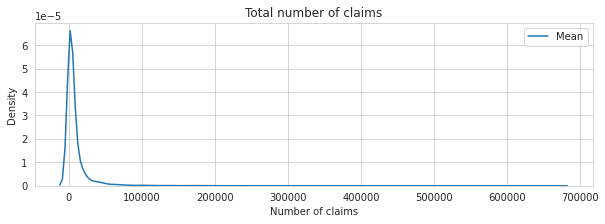

In [ ]:

# genuine_claim_row_means = X_train_provider_features[X_train_provider_features['PotentialFraud']==0].mean(axis=1).values
# fraudulent_claim_row_means = X_train_provider_features[X_train_provider_features['PotentialFraud']==1].mean(axis=1).values

means = X_train_provider_features.mean(axis=1)


plt.figure(figsize=(10,3))
sns.distplot(means, hist=False, label="Mean")
# sns.distplot(fraudulent_claim_row_means, hist=False, label="Fraudulent claims")
plt.title('Total number of claims')
plt.xlabel('Number of claims')
plt.legend()
plt.show()

## Model construction

In [ ]:
result_scores = {}
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Dummy Baseline model on Target Encoded Features

In [ ]:
from sklearn.dummy import DummyClassifier
baseline_clf = DummyClassifier(strategy="most_frequent")
baseline_clf.fit(X_train_provider_features, Y_train_provider_features)
print('Train accuracy = ', baseline_clf.score(X_train_provider_features, Y_train_provider_features)) 
print('Test accuracy = ', baseline_clf.score(X_test_provider_features, Y_test_provider_features)) 


Train accuracy =  0.9054838105932996
Test accuracy =  0.8943055263710864


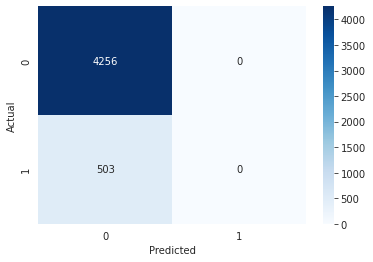

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_pred = baseline_clf.predict(X_test_provider_features)
cm = confusion_matrix(Y_test_provider_features, Y_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Logistic Regression model on Target Encoded Features

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 1)
lr_clf.fit(X_train_provider_features, Y_train_provider_features)
print('Train accuracy = ', lr_clf.score(X_train_provider_features, Y_train_provider_features)) 
print('Test accuracy = ', lr_clf.score(X_test_provider_features, Y_test_provider_features)) 


Train accuracy =  0.7460228336140745
Test accuracy =  0.7184282412271485


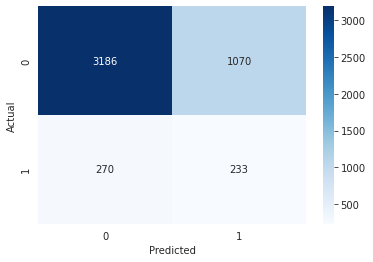

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_pred = lr_clf.predict(X_test_provider_features)
cm = confusion_matrix(Y_test_provider_features, Y_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


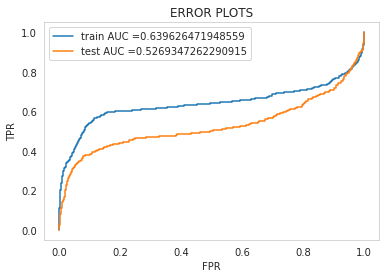

In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(lr_clf, X_train_provider_features)    
y_test_pred = batch_predict(lr_clf, X_test_provider_features)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

# auc_set1 = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


### Hyperparameter tuning for Logistic regression on Target Encoded Features

In [ ]:
#Ref - https://www.geeksforgeeks.org/hyperparameter-tuning/
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

parameters = {'clf__C': np.logspace(-5, 8, 15)}

lr_pipeline = Pipeline([('scaler', MinMaxScaler()), ('clf', LogisticRegression(random_state = 1))])
clf = RandomizedSearchCV(lr_pipeline, parameters, cv = 3, scoring='roc_auc', random_state = 1)
clf.fit(X_train_provider_features, Y_train_provider_features)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['param_C'])
print(results.head(20))

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.161606      0.001758  ...        0.006660                2
1       0.652711      0.057125  ...        0.046271                7
2       0.524972      0.116128  ...        0.035578                6
3       0.118407      0.023096  ...        0.006164                3
4       0.675867      0.114041  ...        0.076871                8
5       0.197161      0.012218  ...        0.007670                1
6       0.153973      0.033226  ...        0.006128                4
7       0.685336      0.064886  ...        0.080356                9
8       0.127091      0.013446  ...        0.006095                5
9       0.606336      0.044353  ...        0.078520               10

[10 rows x 12 columns]


In [ ]:
best_C = clf.best_params_['clf__C']


best_lr_model = LogisticRegression(C = best_C, random_state = 1)
best_lr_model.fit(X_train_provider_features, Y_train_provider_features)


LogisticRegression(C=0.05179474679231213, random_state=1)

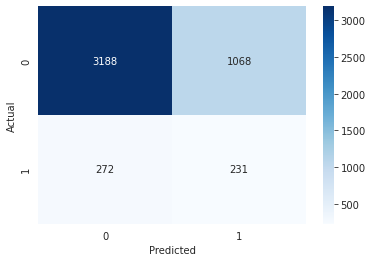

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_pred = best_lr_model.predict(X_test_provider_features)
cm = confusion_matrix(Y_test_provider_features, Y_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




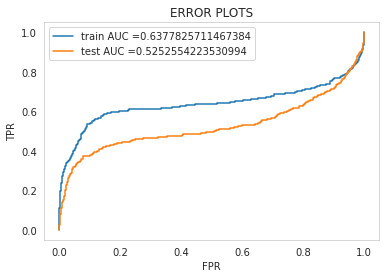

In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(best_lr_model, X_train_provider_features)    
y_test_pred = batch_predict(best_lr_model, X_test_provider_features)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

result_scores['lr_auc'] = auc(test_fpr, test_tpr)
result_scores['lr_f1'] = f1_score(Y_test_provider_features, best_lr_model.predict(X_test_provider_features))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


### Hyperparameter tuning for RandomForest on Target Encoded Features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,200,500,1000,2000]
max_depth = [5, 10]

clf = RandomizedSearchCV(lr_pipeline, parameters, cv = 3, scoring='roc_auc', random_state = 1)
parameters = {'clf__n_estimators': n_estimators, 'clf__max_depth': max_depth}
rf = RandomForestClassifier(random_state = 1)
rf_pipeline = Pipeline([('scaler', MinMaxScaler()), ('clf', rf)])
clf = RandomizedSearchCV(rf_pipeline, parameters, cv = 3, scoring='roc_auc', random_state = 1)
clf.fit(X_train_provider_features, Y_train_provider_features)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['clf__param_n_estimators'])
print(results.head(20))

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.876289      0.044927  ...        0.006907                9
1       0.931298      0.001738  ...        0.006664               10
2       2.286035      0.023070  ...        0.006021                8
3       4.510053      0.055308  ...        0.005676                7
4       8.954429      0.054948  ...        0.006020                6
5       0.730937      0.016027  ...        0.003776                5
6       1.400867      0.010149  ...        0.002282                4
7       3.467950      0.033643  ...        0.001624                3
8       7.308769      0.348554  ...        0.001980                1
9      13.796504      0.042345  ...        0.002263                2

[10 rows x 13 columns]


In [ ]:
best_n_estimators = clf.best_params_['clf__n_estimators']
best_max_depth = clf.best_params_['clf__max_depth']


best_rf_model = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth, random_state = 1)
best_rf_model.fit(X_train_provider_features, Y_train_provider_features)
print('Train accuracy = ', best_rf_model.score(X_train_provider_features, Y_train_provider_features)) 
print('Test accuracy = ', best_rf_model.score(X_test_provider_features, Y_test_provider_features))


Train accuracy =  0.9674340258281864
Test accuracy =  0.8976675772221054


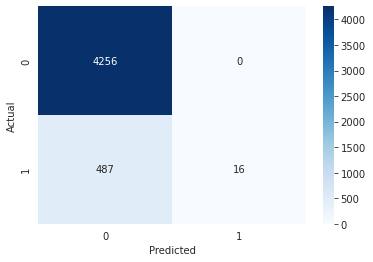

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_pred = best_rf_model.predict(X_test_provider_features)
cm = confusion_matrix(Y_test_provider_features, Y_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


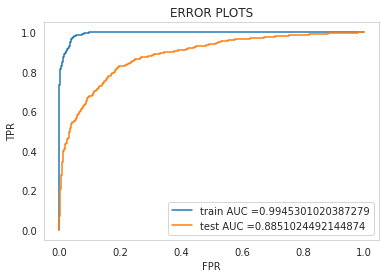

In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(best_rf_model, X_train_provider_features)    
y_test_pred = batch_predict(best_rf_model, X_test_provider_features)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

result_scores['rf_auc'] = auc(test_fpr, test_tpr)
result_scores['rf_f1'] = f1_score(Y_test_provider_features, best_rf_model.predict(X_test_provider_features))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


### Hyperparameter tuning for Decision Tree on Target Encoded Features

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = {'clf__min_samples_split':[5, 10, 100, 500], 'clf__max_depth': [1, 5, 10, 50]}
dt = DecisionTreeClassifier()
dt_pipeline = Pipeline([('scaler', MinMaxScaler()), ('clf', dt)])
clf = RandomizedSearchCV(dt_pipeline, parameters, cv = 3, scoring='roc_auc', random_state = 1)
clf.fit(X_train_provider_features, Y_train_provider_features)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['clf__param_min_samples_split'])
print(results.head(20))


   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.060366      0.005726  ...        0.021472                6
1       0.343569      0.010735  ...        0.026618               10
2       0.098769      0.000936  ...        0.013799                1
3       0.054401      0.003148  ...        0.021472                6
4       0.117746      0.002916  ...        0.024119                2
5       0.180270      0.005609  ...        0.022215                3
6       0.114698      0.004086  ...        0.030197                4
7       0.051685      0.001346  ...        0.021472                6
8       0.329423      0.029546  ...        0.005608                5
9       0.053364      0.003443  ...        0.021472                6

[10 rows x 13 columns]


In [ ]:
best_min_samples_split = clf.best_params_['clf__min_samples_split']
best_max_depth = clf.best_params_['clf__max_depth']


best_dt_model = DecisionTreeClassifier(min_samples_split = best_min_samples_split, max_depth = best_max_depth, random_state = 1)
best_dt_model.fit(X_train_provider_features, Y_train_provider_features)


DecisionTreeClassifier(max_depth=5, min_samples_split=500, random_state=1)

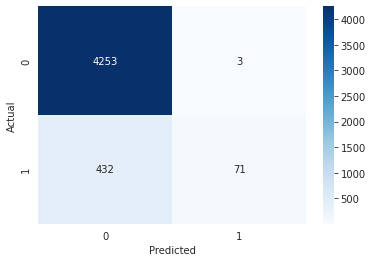

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_pred = best_dt_model.predict(X_test_provider_features)
cm = confusion_matrix(Y_test_provider_features, Y_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


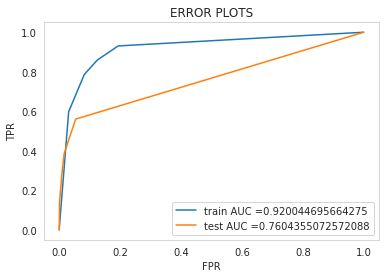

In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(best_dt_model, X_train_provider_features)    
y_test_pred = batch_predict(best_dt_model, X_test_provider_features)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

result_scores['dt_auc'] = auc(test_fpr, test_tpr)
result_scores['dt_f1'] = f1_score(Y_test_provider_features, best_dt_model.predict(X_test_provider_features))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


### Hyper parameter tuning on Xgboost on Target Encoded features

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier()

parameters={
    'clf__learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'clf__n_estimators':[100,200,500,1000,2000],
     'clf__max_depth':[3,5,10],
    'clf__colsample_bytree':[0.1,0.3,0.5,1],
    'clf__subsample':[0.1,0.3,0.5,1]
}
xgb_pipeline = Pipeline([('scaler', MinMaxScaler()), ('clf', xgb)])

clf = RandomizedSearchCV(xgb_pipeline, param_distributions=parameters, cv=3, scoring='roc_auc', random_state = 1)

clf.fit(X_train_provider_features, Y_train_provider_features)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['param_min_samples_split'])


In [ ]:
print(results.head(20))
print(clf.best_params_)
print(results['mean_test_score'])

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       4.705187      0.972344  ...        0.005645               10
1      18.019097      5.570901  ...        0.003907                7
2      38.738368      1.053104  ...        0.005596                5
3       3.515412      0.110439  ...        0.005311                6
4      19.940169      0.244370  ...        0.008249                8
5       3.527084      0.043202  ...        0.005861                3
6       1.316417      0.029709  ...        0.008218                9
7       1.547060      0.023553  ...        0.004014                4
8       3.684604      0.015276  ...        0.004518                2
9      12.596815      0.353330  ...        0.003194                1

[10 rows x 16 columns]
{'clf__subsample': 0.3, 'clf__n_estimators': 500, 'clf__max_depth': 5, 'clf__learning_rate': 0.01, 'clf__colsample_bytree': 0.5}
0    0.911780
1    0.922755
2    0.930647
3    0.930255
4    0.921383
5    0.933802
6   

In [ ]:

best_learning_rate = clf.best_params_['clf__learning_rate']
best_n_estimators = clf.best_params_['clf__n_estimators']
best_max_depth = clf.best_params_['clf__max_depth']
best_colsample_bytree = clf.best_params_['clf__colsample_bytree']
best_subsample = clf.best_params_['clf__subsample']


best_xgb_model = XGBClassifier(learning_rate = best_learning_rate, n_estimators = best_n_estimators, max_depth = best_max_depth, colsample_bytree = best_colsample_bytree, subsample = best_subsample, random_state = 1)
best_xgb_model.fit(X_train_provider_features, Y_train_provider_features)
# best_xgb_model = CalibratedClassifierCV(best_model, method='sigmoid')
# best_xgb_model.fit(X_train_provider_features, Y_train_provider_features)

print('Train accuracy = ', best_xgb_model.score(X_train_provider_features, Y_train_provider_features)) 
print('Test accuracy = ', best_xgb_model.score(X_test_provider_features, Y_test_provider_features))


Train accuracy =  0.9562043795620438
Test accuracy =  0.9037612943895776


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_pred = best_xgb_model.predict(X_test_provider_features)
cm = confusion_matrix(Y_test_provider_features, Y_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(best_xgb_model, X_train_provider_features)    
y_test_pred = batch_predict(best_xgb_model, X_test_provider_features)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

result_scores['xgb_auc'] = auc(test_fpr, test_tpr)
result_scores['xgb_f1'] = f1_score(Y_test_provider_features, best_xgb_model.predict(X_test_provider_features))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


### Computing class weights

In [ ]:
# Ref - https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes = np.unique(Y_train_provider_features), y = Y_train_provider_features)
print(class_weights)
print(np.unique(Y_train_provider_features, return_counts = True))
class_weight_dict = {i: cw for i, cw in enumerate(class_weights)}
print(class_weight_dict)


[0.55222956 5.28656126]
(array([0, 1], dtype=int64), array([4844,  506]))
{0: 0.5522295623451693, 1: 5.286561264822135}


### F1-Score function to optimise during Hyper-parameter tuning

In [ ]:
from sklearn.metrics import f1_score

def f1Score(clf, X_val, y_true):   
     y_pred = clf.predict(X_val)
     return f1_score(y_true, y_pred)


### Hyperparameter tuning for Logistic regression on Target Encoded Features - with class weights

In [ ]:
#Ref - https://www.geeksforgeeks.org/hyperparameter-tuning/
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

parameters = {'clf__C': np.logspace(-5, 8, 15)}
lr = LogisticRegression(random_state = 1, class_weight = class_weight_dict)
lr_pipeline = Pipeline([('scaler', MinMaxScaler()), ('clf', lr)])
clf = RandomizedSearchCV(lr_pipeline, parameters, cv = 3, scoring=f1Score, random_state = 1)
clf.fit(X_train_provider_features, Y_train_provider_features)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['param_C'])


In [ ]:
print(clf.best_params_)

In [ ]:
best_C = clf.best_params_['clf__C']


best_lr_model = LogisticRegression(C = best_C, class_weight = class_weight_dict, random_state = 1)
best_lr_model.fit(X_train_provider_features, Y_train_provider_features)


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_train_pred = best_lr_model.predict(X_train_provider_features)
Y_test_pred = best_lr_model.predict(X_test_provider_features)
cm = confusion_matrix(Y_test_provider_features, Y_test_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print('Train F1 Score = ', f1_score(Y_train_provider_features, Y_train_pred)) 
print('Test F1 Score = ', f1_score(Y_test_provider_features, Y_test_pred))



In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(best_lr_model, X_train_provider_features)    
y_test_pred = batch_predict(best_lr_model, X_test_provider_features)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

result_scores['lr_weighted_auc'] = auc(test_fpr, test_tpr)
result_scores['lr_weighted_f1'] = f1_score(Y_test_provider_features, best_lr_model.predict(X_test_provider_features))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


### Hyperparameter tuning for RandomForest on Target Encoded Features - with class weights

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,200,500,1000,2000]
max_depth = [5, 10]
parameters = {'clf__n_estimators': n_estimators, 'clf__max_depth': max_depth}
rf = RandomForestClassifier(random_state = 1, class_weight = class_weight_dict)
rf_pipeline = Pipeline([('scaler', MinMaxScaler()), ('clf', rf)])
clf = RandomizedSearchCV(rf_pipeline, parameters, cv = 3, scoring=f1Score, random_state = 1)
clf.fit(X_train_provider_features, Y_train_provider_features)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['param_n_estimators'])
print(results.head(20))

In [ ]:
print(clf.best_params_)

{'clf__n_estimators': 1000, 'clf__max_depth': 10}


In [ ]:
best_n_estimators = clf.best_params_['clf__n_estimators']
best_max_depth = clf.best_params_['clf__max_depth']


best_rf_model = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth, random_state = 1, class_weight = class_weight_dict)
best_rf_model.fit(X_train_provider_features, Y_train_provider_features)



In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_train_pred = best_rf_model.predict(X_train_provider_features)
Y_test_pred = best_rf_model.predict(X_test_provider_features)
cm = confusion_matrix(Y_test_provider_features, Y_test_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print('Train F1 Score = ', f1_score(Y_train_provider_features, Y_train_pred)) 
print('Test F1 Score = ', f1_score(Y_test_provider_features, Y_test_pred))



In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(best_rf_model, X_train_provider_features)    
y_test_pred = batch_predict(best_rf_model, X_test_provider_features)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

result_scores['rf_weighted_auc'] = auc(test_fpr, test_tpr)
result_scores['rf_weighted_f1'] = f1_score(Y_test_provider_features, best_rf_model.predict(X_test_provider_features))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


### Hyperparameter tuning for Decision Tree on Target Encoded Features - with class weights

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


parameters = {'clf__min_samples_split':[5, 10, 100, 500], 'clf__max_depth': [1, 5, 10, 50]}
dt = DecisionTreeClassifier(class_weight = class_weight_dict)
dt_pipeline = Pipeline([('scaler', MinMaxScaler()), ('clf', dt)])
clf = RandomizedSearchCV(dt_pipeline, parameters, cv = 3, scoring=f1Score, random_state = 1)
# print(X_train_provider_features.columns.values)
clf.fit(X_train_provider_features, Y_train_provider_features)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['param_min_samples_split'])
print(results.head(20))
print(clf.best_params_)


   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.161079      0.032511  ...        0.049486                1
1       0.567909      0.013503  ...        0.024478                9
2       0.326364      0.029094  ...        0.048370                5
3       0.199914      0.033745  ...        0.049486                1
4       0.469257      0.009912  ...        0.003513                7
5       0.661887      0.184862  ...        0.013033                8
6       0.320295      0.043455  ...        0.008288                6
7       0.189447      0.058275  ...        0.049486                1
8       0.689996      0.066478  ...        0.017792               10
9       0.178835      0.020504  ...        0.049486                1

[10 rows x 13 columns]
{'clf__min_samples_split': 500, 'clf__max_depth': 1}


In [ ]:
best_min_samples_split = clf.best_params_['clf__min_samples_split']
best_max_depth = clf.best_params_['clf__max_depth']


best_dt_model = DecisionTreeClassifier(min_samples_split = best_min_samples_split, max_depth = best_max_depth, class_weight = class_weight_dict, random_state = 1)
best_dt_model.fit(X_train_provider_features, Y_train_provider_features)


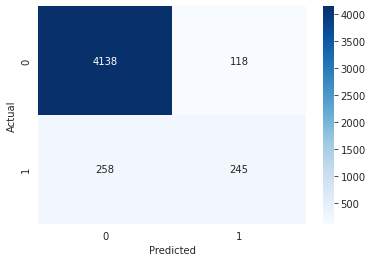

Train F1 Score =  0.5033333333333333
Test F1 Score =  0.5658198614318708


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_train_pred = best_dt_model.predict(X_train_provider_features)
Y_test_pred = best_dt_model.predict(X_test_provider_features)
cm = confusion_matrix(Y_test_provider_features, Y_test_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print('Train F1 Score = ', f1_score(Y_train_provider_features, Y_train_pred)) 
print('Test F1 Score = ', f1_score(Y_test_provider_features, Y_test_pred))



In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(best_dt_model, X_train_provider_features)    
y_test_pred = batch_predict(best_dt_model, X_test_provider_features)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

result_scores['dt_weighted_auc'] = auc(test_fpr, test_tpr)
result_scores['dt_weighted_f1'] = f1_score(Y_test_provider_features, best_dt_model.predict(X_test_provider_features))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


In [ ]:
# Dumping the best Decision tree model
pickle.dump(best_dt_model, open("best_dt_model.pkl", "wb"))

### Hyper parameter tuning on Xgboost on Target Encoded features - with class weights

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(scale_pos_weight = class_weight_dict[0] / class_weight_dict[1])

parameters={
    'clf__learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'clf__n_estimators':[100,200,500,1000,2000],
     'clf__max_depth':[3,5,10],
    'clf__colsample_bytree':[0.1,0.3,0.5,1],
    'clf__subsample':[0.1,0.3,0.5,1]
}

xgb_pipeline = Pipeline([('scaler', MinMaxScaler()), ('clf', xgb)])

clf = RandomizedSearchCV(xgb_pipeline, param_distributions=parameters, cv=3, scoring=f1Score, random_state = 1)

clf.fit(X_train_provider_features, Y_train_provider_features)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['param_min_samples_split'])


In [ ]:
print(results.head(20))
print(clf.best_params_)
print(results['mean_test_score'])

In [ ]:
# from sklearn.calibration import CalibratedClassifierCV

best_learning_rate = clf.best_params_['clf__learning_rate']
best_n_estimators = clf.best_params_['clf__n_estimators']
best_max_depth = clf.best_params_['clf__max_depth']
best_colsample_bytree = clf.best_params_['clf__colsample_bytree']
best_subsample = clf.best_params_['clf__subsample']


best_xgb_model = XGBClassifier(learning_rate = best_learning_rate, n_estimators = best_n_estimators, max_depth = best_max_depth, colsample_bytree = best_colsample_bytree, subsample = best_subsample, random_state = 1, scale_pos_weight = class_weight_dict[1] / class_weight_dict[0])
best_xgb_model.fit(X_train_provider_features, Y_train_provider_features)
# best_xgb_model = CalibratedClassifierCV(best_model, method='sigmoid')
# best_xgb_model.fit(X_train_provider_features, Y_train_provider_features)

XGBClassifier(colsample_bytree=0.3, learning_rate=0.2, max_depth=10,
              n_estimators=1000, random_state=1,
              scale_pos_weight=9.58019801980198)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_train_pred = best_xgb_model.predict(X_train_provider_features)
Y_test_pred = best_xgb_model.predict(X_test_provider_features)
cm = confusion_matrix(Y_test_provider_features, Y_test_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print('Train F1 Score = ', f1_score(Y_train_provider_features, Y_train_pred)) 
print('Test F1 Score = ', f1_score(Y_test_provider_features, Y_test_pred))



In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(best_xgb_model, X_train_provider_features)    
y_test_pred = batch_predict(best_xgb_model, X_test_provider_features)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

result_scores['xgb_weighted_auc'] = auc(test_fpr, test_tpr)
result_scores['xgb_weighted_f1'] = f1_score(Y_test_provider_features, best_xgb_model.predict(X_test_provider_features))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


### Creating custom Ensemble model

In [ ]:
D1_X, D2_X, D1_Y, D2_Y = train_test_split(X_train_provider_features, Y_train_provider_features, stratify=Y_train_provider_features, test_size=0.5, random_state = 1)
print(D1_X.shape)
print(D1_Y.shape)
print(D2_X.shape)
print(D2_Y.shape)

In [ ]:
D1_X = D1_X.values
D1_Y = D1_Y.values
D2_X = D2_X.values
D2_Y = D2_Y.values


In [ ]:
import random
def generating_samples(input_data, target_data):

    # you can use random.choice to generate random indices without replacement
    # Please have a look at this link https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.choice.html for more details
    # Please follow above pseudo code for generating samples 
    row_indices = range(0, len(input_data))
    random_60_size = int(0.6 * len(row_indices))
    random_40_size = len(row_indices) - random_60_size
    selected_row_indices = np.random.choice(row_indices, size = random_60_size, replace = False)
    replicated_row_indices = np.random.choice(selected_row_indices, size = random_40_size, replace = False)
    
    # column_indices = range(0, len(input_data[0]))
    # selected_column_indices = np.random.choice(column_indices, size = random.randint(3, len(input_data[0])), replace = False)
    
    sample_data = input_data[selected_row_indices]
    target_of_sample_data = target_data[selected_row_indices]
    
    replicated_sample_data = input_data[replicated_row_indices]
    target_of_replicated_sample_data = target_data[replicated_row_indices]
    
    final_sample_data = np.vstack((sample_data, replicated_sample_data))
    final_target_data = np.vstack((target_of_sample_data.reshape(-1, 1), target_of_replicated_sample_data.reshape(-1, 1)))

    return final_sample_data, final_target_data
    #note please return as lists


In [ ]:
# Use generating_samples function to create 30 samples 
NO_OF_SAMPLES = 30
list_input_data =[]
list_output_data = []

for i in range(0, NO_OF_SAMPLES):
    sample_x, sample_y = generating_samples(D1_X, D1_Y)
    list_input_data.append(sample_x)
    list_output_data.append(sample_y)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
list_of_all_models = []
for i in range(0, NO_OF_SAMPLES):
    dt = DecisionTreeClassifier(class_weight = class_weight_dict)
    X = list_input_data[i]
    Y = list_output_data[i]
    dt.fit(X, Y)
    list_of_all_models.append(dt)

In [ ]:
from tqdm import tqdm
from scipy import stats

D2_Y_Pred = []
for row in tqdm(D2_X):
    y_pred_array = []
    
    for model in list_of_all_models:
        y_pred = model.predict(row.reshape(1, -1))[0]
        y_pred_array.append(y_pred)
    
    ## Choosing the most predicted class as the final prediction
    prediction = stats.mode(y_pred_array)[0]
    D2_Y_Pred.append(prediction)

#### Meta-model with XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(scale_pos_weight = class_weight_dict[0] / class_weight_dict[1])

parameters={
    'clf__learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'clf__n_estimators':[100,200,500,1000,2000],
     'clf__max_depth':[3,5,10],
    'clf__colsample_bytree':[0.1,0.3,0.5,1],
    'clf__subsample':[0.1,0.3,0.5,1]
}

xgb_pipeline = Pipeline([('scaler', MinMaxScaler()), ('clf', xgb)])
clf = RandomizedSearchCV(xgb_pipeline, parameters, cv = 3, scoring=f1Score, random_state = 1)


clf.fit(D2_X, D2_Y_Pred)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['param_min_samples_split'])


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

best_learning_rate = clf.best_params_['clf__learning_rate']
best_n_estimators = clf.best_params_['clf__n_estimators']
best_max_depth = clf.best_params_['clf__max_depth']
best_colsample_bytree = clf.best_params_['clf__colsample_bytree']
best_subsample = clf.best_params_['clf__subsample']


best_xgb_meta_model = XGBClassifier(learning_rate = best_learning_rate, n_estimators = best_n_estimators, max_depth = best_max_depth, colsample_bytree = best_colsample_bytree, subsample = best_subsample, random_state = 1, scale_pos_weight = class_weight_dict[1] / class_weight_dict[0])
best_xgb_meta_model.fit(D2_X, D2_Y_Pred)
# best_xgb_model = CalibratedClassifierCV(best_model, method='sigmoid')
# best_xgb_model.fit(X_train_provider_features, Y_train_provider_features)

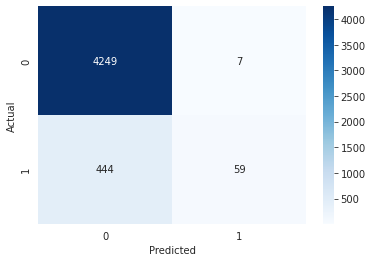

Train F1 Score =  0.5580865603644647
Test F1 Score =  0.20738137082601055


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_train_pred = best_xgb_meta_model.predict(X_train_provider_features.values)
Y_test_pred = best_xgb_meta_model.predict(X_test_provider_features.values)
cm = confusion_matrix(Y_test_provider_features, Y_test_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print('Train F1 Score = ', f1_score(Y_train_provider_features, Y_train_pred)) 
print('Test F1 Score = ', f1_score(Y_test_provider_features, Y_test_pred))



In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(best_xgb_meta_model, X_train_provider_features.values)    
y_test_pred = batch_predict(best_xgb_meta_model, X_test_provider_features.values)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

result_scores['custom_ensemble_xgb_weighted_auc'] = auc(test_fpr, test_tpr)
result_scores['custom_ensemble_xgb_weighted_f1'] = f1_score(Y_test_provider_features, best_xgb_meta_model.predict(X_test_provider_features.values))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


#### Meta-model with Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = {'clf__min_samples_split':[5, 10, 100, 500], 'clf__max_depth': [1, 5, 10, 50]}
dt = DecisionTreeClassifier(class_weight = class_weight_dict)
dt_pipeline = Pipeline([('scaler', MinMaxScaler()), ('clf', dt)])
clf = RandomizedSearchCV(dt_pipeline, parameters, cv = 3, scoring=f1Score, random_state = 1)
clf.fit(D2_X, D2_Y_Pred)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['param_min_samples_split'])
print(results.head(20))
print(clf.best_params_)


In [ ]:
best_min_samples_split = clf.best_params_['clf__min_samples_split']
best_max_depth = clf.best_params_['clf__max_depth']


best_dt_meta_model = DecisionTreeClassifier(min_samples_split = best_min_samples_split, max_depth = best_max_depth, class_weight = class_weight_dict, random_state = 1)
best_dt_meta_model.fit(D2_X, D2_Y_Pred)


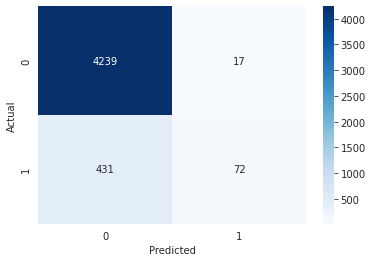

Train F1 Score =  0.5565217391304348
Test F1 Score =  0.24324324324324323


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
Y_train_pred = best_dt_meta_model.predict(X_train_provider_features.values)
Y_test_pred = best_dt_meta_model.predict(X_test_provider_features.values)
cm = confusion_matrix(Y_test_provider_features, Y_test_pred)
# print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print('Train F1 Score = ', f1_score(Y_train_provider_features, Y_train_pred)) 
print('Test F1 Score = ', f1_score(Y_test_provider_features, Y_test_pred))



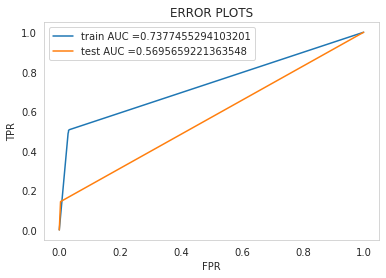

In [ ]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(best_dt_meta_model, X_train_provider_features)    
y_test_pred = batch_predict(best_dt_meta_model, X_test_provider_features)
# print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train_provider_features, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test_provider_features, y_test_pred)

result_scores['custom_ensemble_dt_weighted_auc'] = auc(test_fpr, test_tpr)
result_scores['custom_ensemble_dt_weighted_f1'] = f1_score(Y_test_provider_features, best_dt_meta_model.predict(X_test_provider_features))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


## Summary

In [ ]:
from prettytable import PrettyTable 
summaryTable = PrettyTable(["Algorithm", "Test F1 Score (without weights)", "Test AUC (without weights)", "Test F1 Score (with weights)", "Test AUC (with weights)"]) 
  
# Add rows 
summaryTable.add_row(["Logistic Regression", result_scores['lr_f1'], result_scores['lr_auc'], result_scores['lr_weighted_f1'], result_scores['lr_weighted_auc']]) #
summaryTable.add_row(["Decision Tree",  result_scores['dt_f1'], result_scores['dt_auc'], result_scores['dt_weighted_f1'], result_scores['dt_weighted_auc']]) #
summaryTable.add_row(["Random Forest", result_scores['rf_f1'], result_scores['rf_auc'], result_scores['rf_weighted_f1'], result_scores['rf_weighted_auc']]) #
summaryTable.add_row(["XGBoost", result_scores['xgb_f1'], result_scores['xgb_auc'], result_scores['xgb_weighted_f1'], result_scores['xgb_weighted_auc']]) #
summaryTable.add_row(["Custom Ensemble - XGB Meta model", '-', '-', result_scores['custom_ensemble_xgb_weighted_f1'], result_scores['custom_ensemble_xgb_weighted_auc']]) #
summaryTable.add_row(["Custom Ensemble - Decision Tree Meta model", '-', '-', result_scores['custom_ensemble_dt_weighted_f1'], result_scores['custom_ensemble_dt_weighted_auc']]) #
  
print(summaryTable)

+--------------------------------------------+---------------------------------+----------------------------+------------------------------+-------------------------+
|                 Algorithm                  | Test F1 Score (without weights) | Test AUC (without weights) | Test F1 Score (with weights) | Test AUC (with weights) |
+--------------------------------------------+---------------------------------+----------------------------+------------------------------+-------------------------+
|            Logistic Regression             |        0.2563817980022197       |     0.5252554223530994     |     0.25286132552568535      |    0.8705688799533626   |
|               Decision Tree                |       0.24610051993067592       |     0.7604355072572088     |      0.5658198614318708      |    0.729675985440739    |
|               Random Forest                |       0.06165703275529865       |     0.8851024492144874     |      0.380517503805175       |    0.8941020231991508   



*   Implemented 4 algorithms - with class weights and without class weights
*   Since the data is imbalanced, algorithms without class weights did not lead to a healthy F1 Score
* After weights were added, F1 Score improved
* By far, Logistic regression was the least favorable model
* Random forest algorithm led to over-fitting
* Decision Tree and XGBoost algorithms did reasonably well. 
* Decision Tree had a higher F1 Score too. This is the most favorable model
* Implemented a custom ensemble model with 30 samples (generated with replacement). Used Decision tree for base model and tried with XGBoost and Decision tree for meta models. The custom ensemble model did not do better than standalone Decision Tree

